# TP2 - Traitement du signal - Ondelettes discrètes

Le but de ce TP est de mettre en oeuvre et de visualiser des différences notoires entre transformé de Fourier et utilisation d'ondelette 

In [1]:
%plot -s 1600,800

## 1 - Transformée d'ondelette continue - Wavelet Toolbox (Matlab)

L'analyse par ondelettes traitent les données à différentes échelles ou résolutions. Le but est de "voir" les échelles "grossière" correspondant aux basses fréquences en analyse de Fourier mais aussi de voir et de localiser dans le temps les hautes fréquences. Le résultat de l'analyse par ondelettes est de voir à la fois la forêt, les arbres et les feuilles ... 

Pour commencer regardons ce que fournit la Wavelet Toolbox de Matlab

In [2]:
 help wavelet

  Wavelet Toolbox
  Version 4.18 (R2017a) 16-Feb-2017
 
  Wavelet Toolbox GUI (Graphical User Interface).
    waveletAnalyzer - Start Wavelet Analyzer graphical user interface tools.
 
  Wavelets: General.
    biorfilt    - Biorthogonal wavelet filter set.
    centfrq     - Wavelet center frequency.
    dyaddown    - Dyadic downsampling.
    dyadup      - Dyadic upsampling.
    intwave     - Integrate wavelet function psi.
    orthfilt    - Orthogonal wavelet filter set.
    qmf         - Quadrature mirror filter.
    scal2frq    - Scale to frequency.
    wavefun     - Wavelet and scaling functions.
    wavefun2    - Wavelets and scaling functions 2-D.
    wavemngr    - Wavelet manager. 
    wfilters    - Wavelet filters.
    wmaxlev     - Maximum wavelet decomposition level.
    wscalogram  - Scalogram for continuous wavelet transform.
 
  Wavelet Families.
    biorwavf        - Biorthogonal spline wavelet filters.
    cgauwavf        - Complex Gaussian wavelet.
    cmorwavf        - 

Mots clefs Matlab : waveletfamilies, wavefun, cwt, scalograme ...

In [3]:
waveletfamilies('f')

Haar              		haar           
Daubechies        		db             
Symlets           		sym            
Coiflets          		coif           
BiorSplines       		bior           
ReverseBior       		rbio           
Meyer             		meyr           
DMeyer            		dmey           
Gaussian          		gaus           
Mexican_hat       		mexh           
Morlet            		morl           
Complex Gaussian  		cgau           
Shannon           		shan           
Frequency B-Spline		fbsp           
Complex Morlet    		cmor           
Fejer-Korovkin    		fk             
 


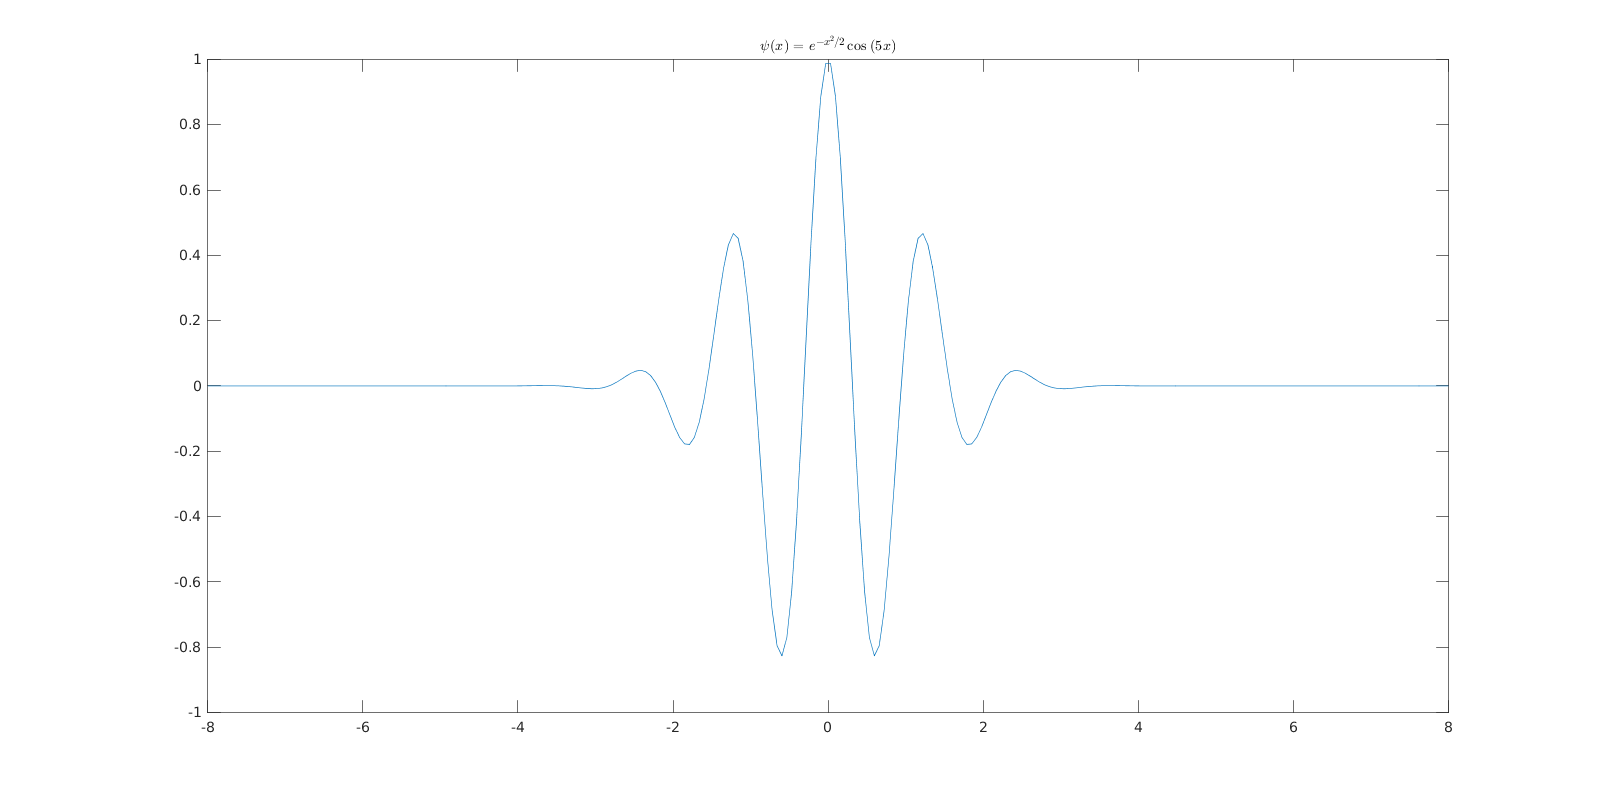

In [4]:
[psi,xval] = wavefun('morl');
plot(xval,psi);
title('$\psi(x) = e^{-x^2/2} \cos{(5x)}$','Interpreter','latex');

**Remarque :**  Cette toolbox offre un outil graphique et interactif très puissant : waveletAnalyzer (pas sous jupyter)

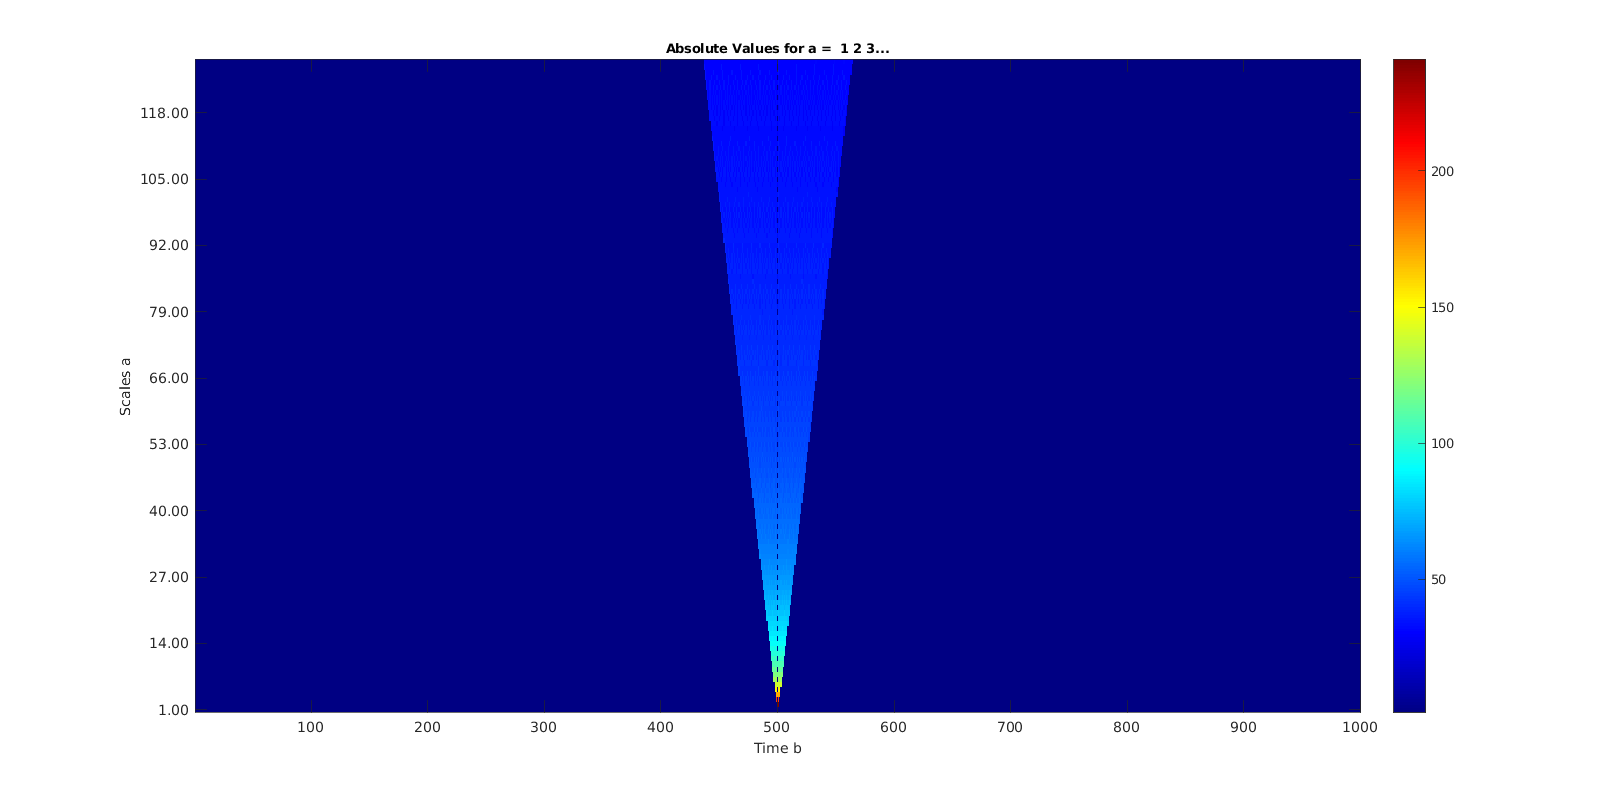

In [5]:
x = zeros(1000,1);
x(500) = 1;
CWTcoeffs = cwt(x,1:128,'haar','plot');
colormap jet;
colorbar;

### Exercice 1

Tracer la courbe et scalogramme des signaux suivant (ou pourra tester différentes "familles d'ondelette").
Utiliser différents échantillonages (nombre de valeurs prise en des points équidistribués) pour les fonctions suivantes :

* $f(t)=H(t)$ $\quad t\in[-2;2]$ ($H$ Fonction de Heaviside)
* $f(t)=\max(0,t)$ $\quad t\in[-2;2]$
* $f(t)=sign(\sin(20\pi t))$
* $f(t)=\begin{cases} sin(4\pi t) & 0\leq t < \frac{1}{2} \\ sin(40\pi t) & \frac{1}{2}\leq t \leq 1 \end{cases}$
* $f(t)=\sin(2\pi t) + \sin(200\pi t)$
* $f(t)=\sin(2\pi t)\sin(200\pi t)$
* $f(t)=\sin(2\pi t^2)$ $t\in [0;10]$



## 1) $f(t)=H(t)$ $\quad t\in[-2;2]$ ($H$ Fonction de Heaviside)

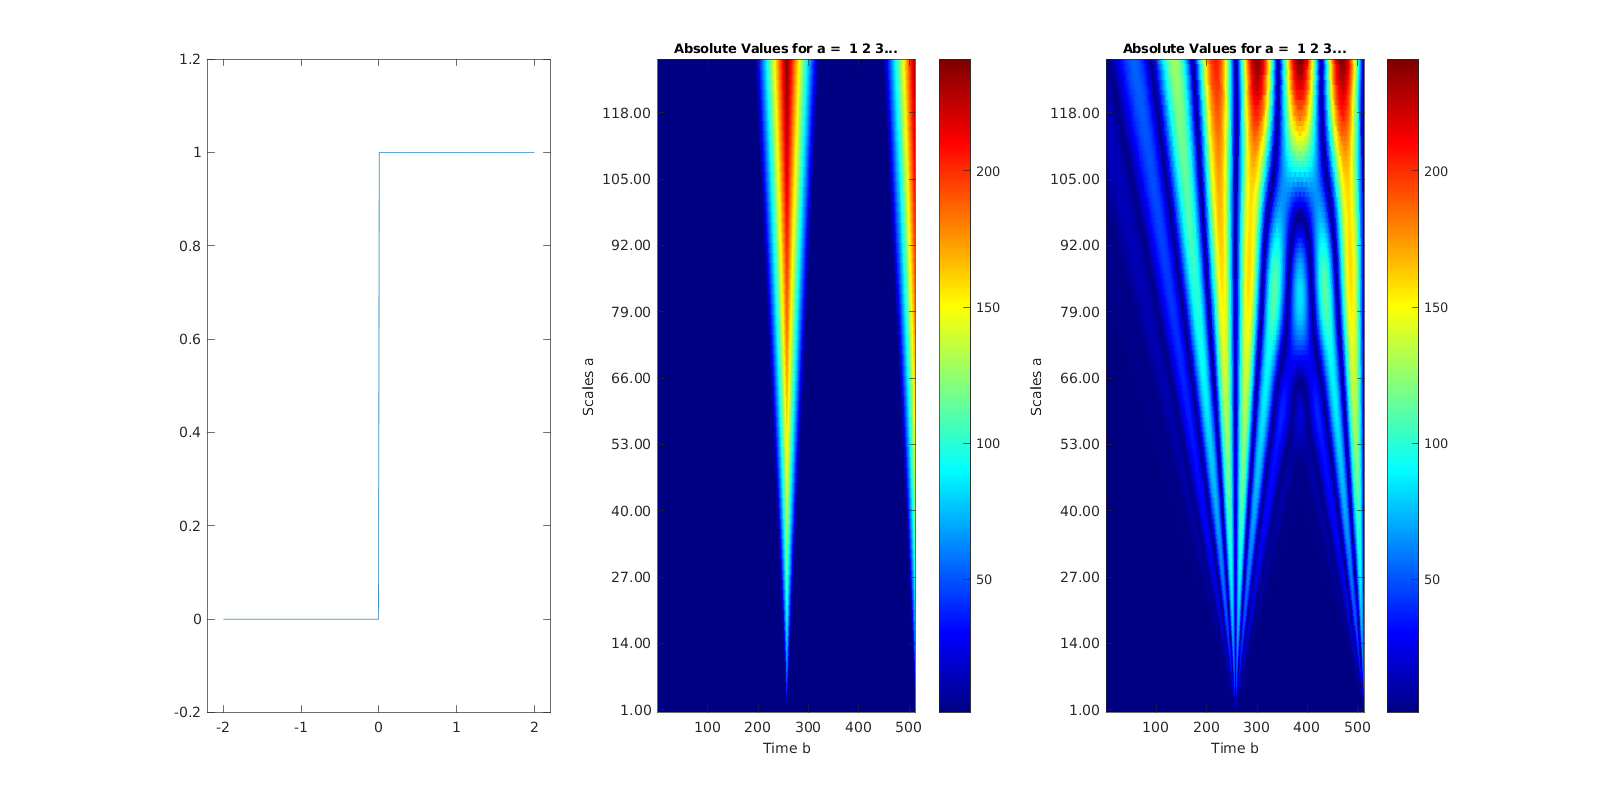

In [24]:
subplot(1,3,1);
x =linspace(-2,2,512) ;
y1 =heaviside(x);
plot(x,y1)
ylim([-0.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



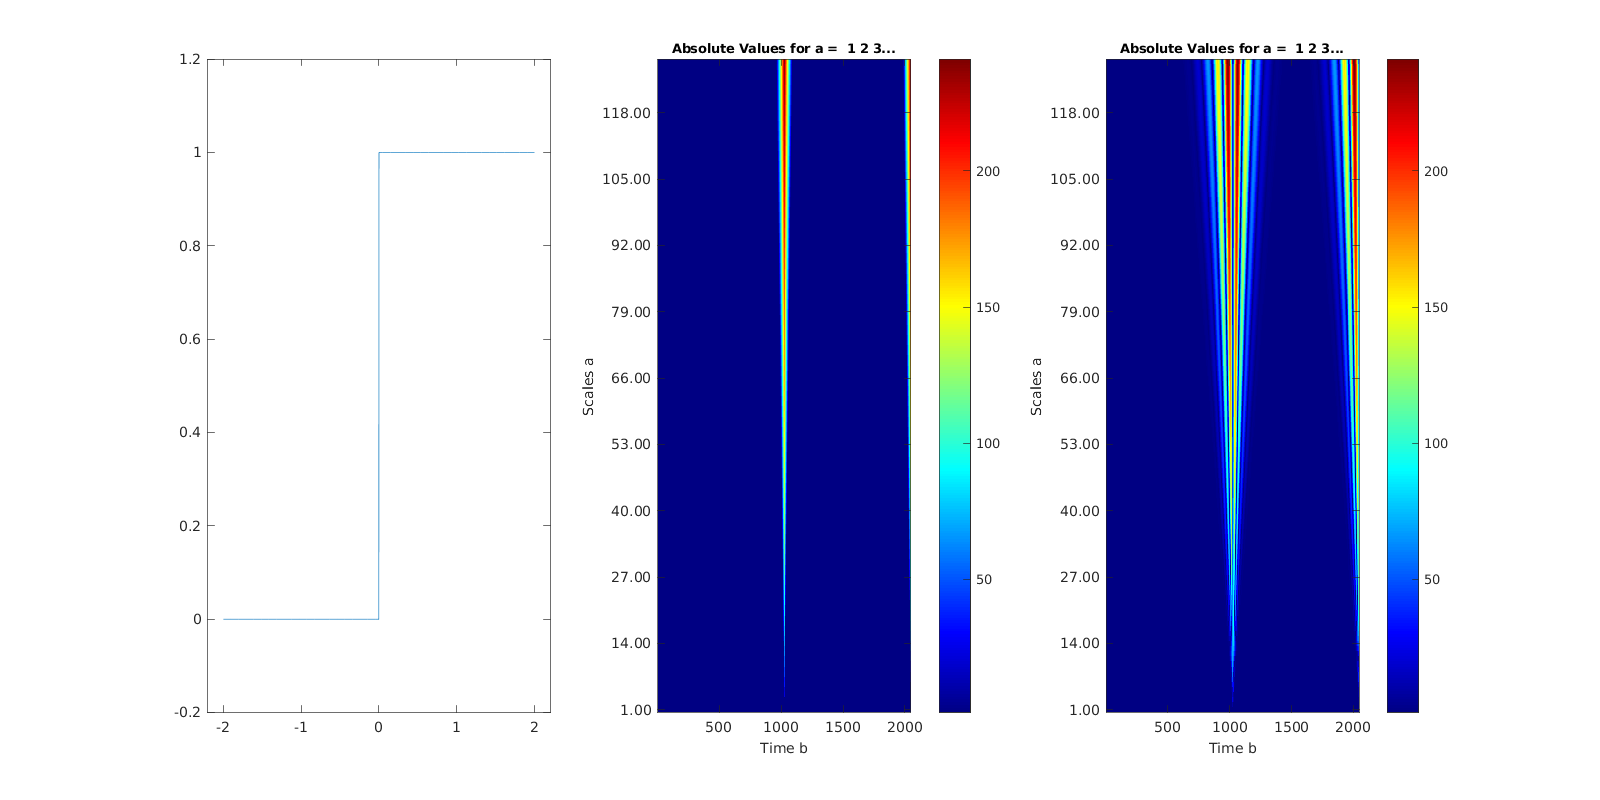

In [26]:
subplot(1,3,1);
x =linspace(-2,2,4*512) ;
y1 =heaviside(x);
plot(x,y1)
ylim([-0.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;

## 2) $f(t)=\max(0,t)$ $\quad t\in[-2;2]$

In [44]:
g=inline('t.*(1-(t<0))')


g =

     Inline function:
     g(t) = t.*(1-(t<0))



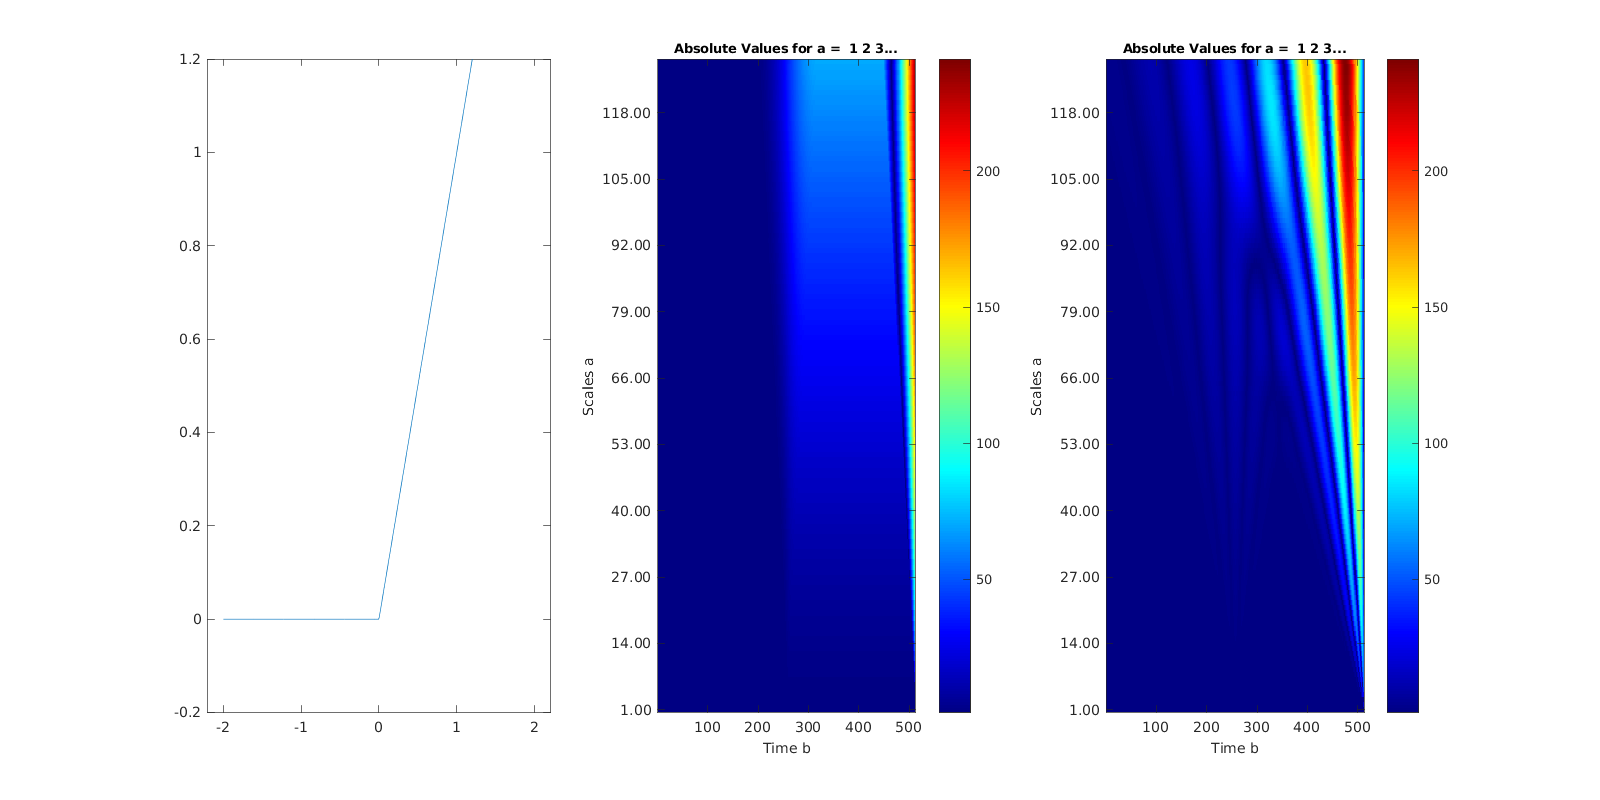

In [47]:
subplot(1,3,1);
x =linspace(-2,2,512) ;
y1 =g(x);
plot(x,y1)
ylim([-0.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



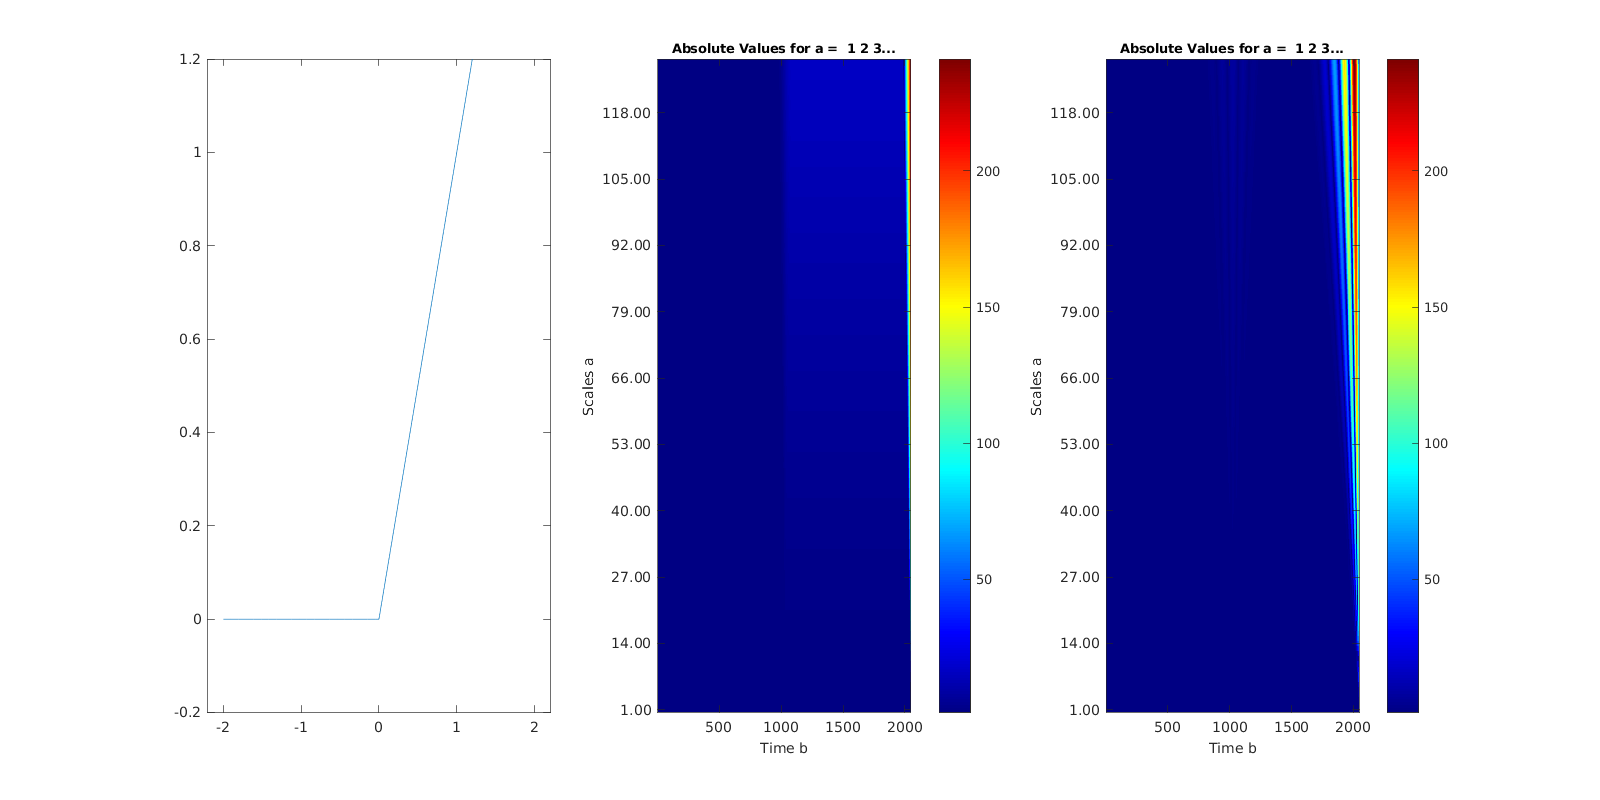

In [48]:
subplot(1,3,1);
x =linspace(-2,2,4*512) ;
y1 =g(x);
plot(x,y1)
ylim([-0.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



## 3) $f(t)=sign(\sin(20\pi t))$

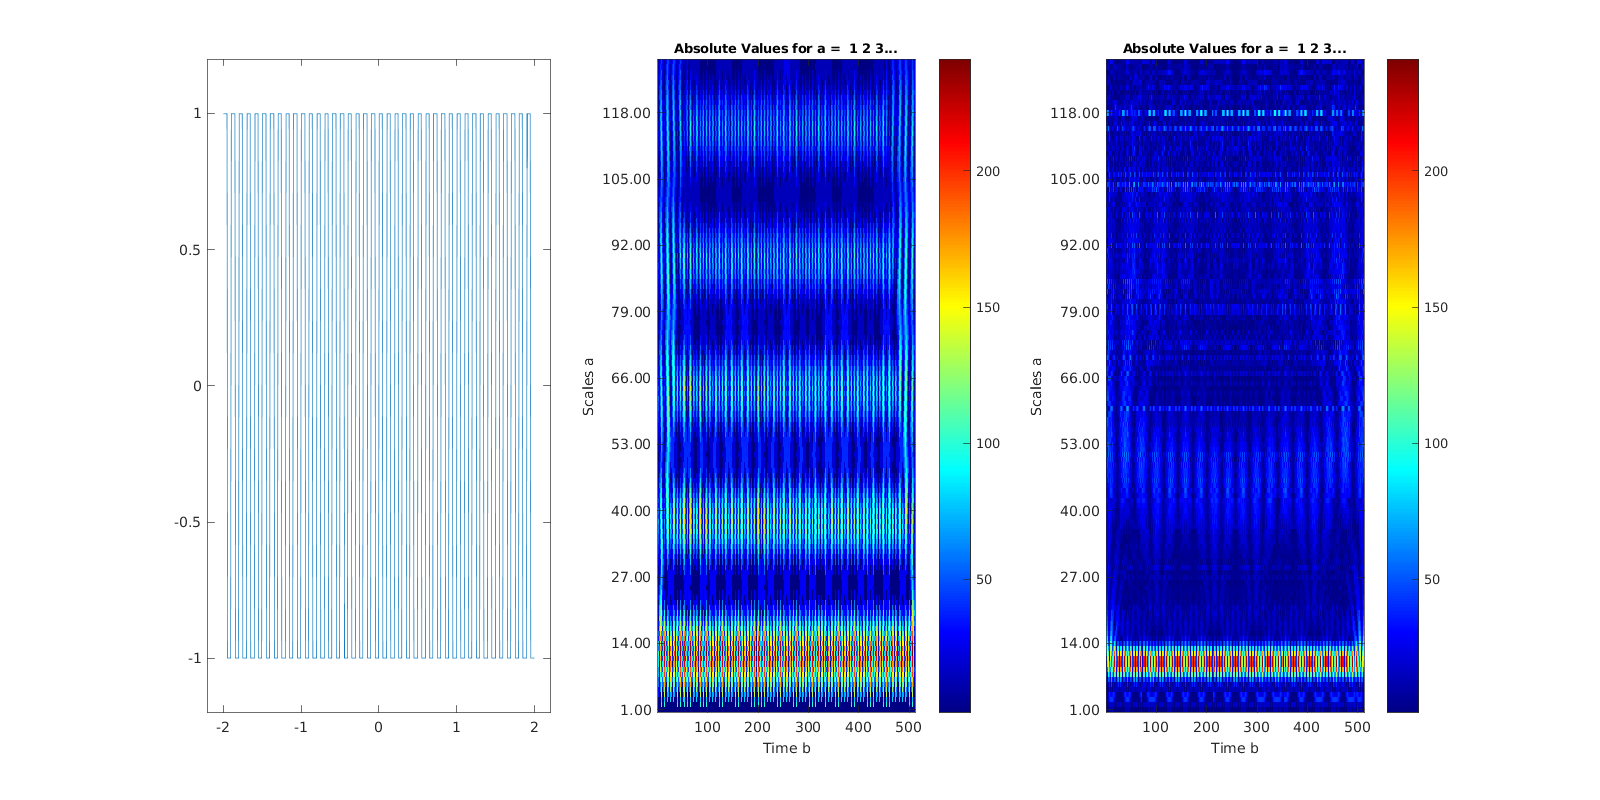

In [52]:
subplot(1,3,1);
x =linspace(-2,2,512) ;
y1 =sign(sin(20*pi*x));
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



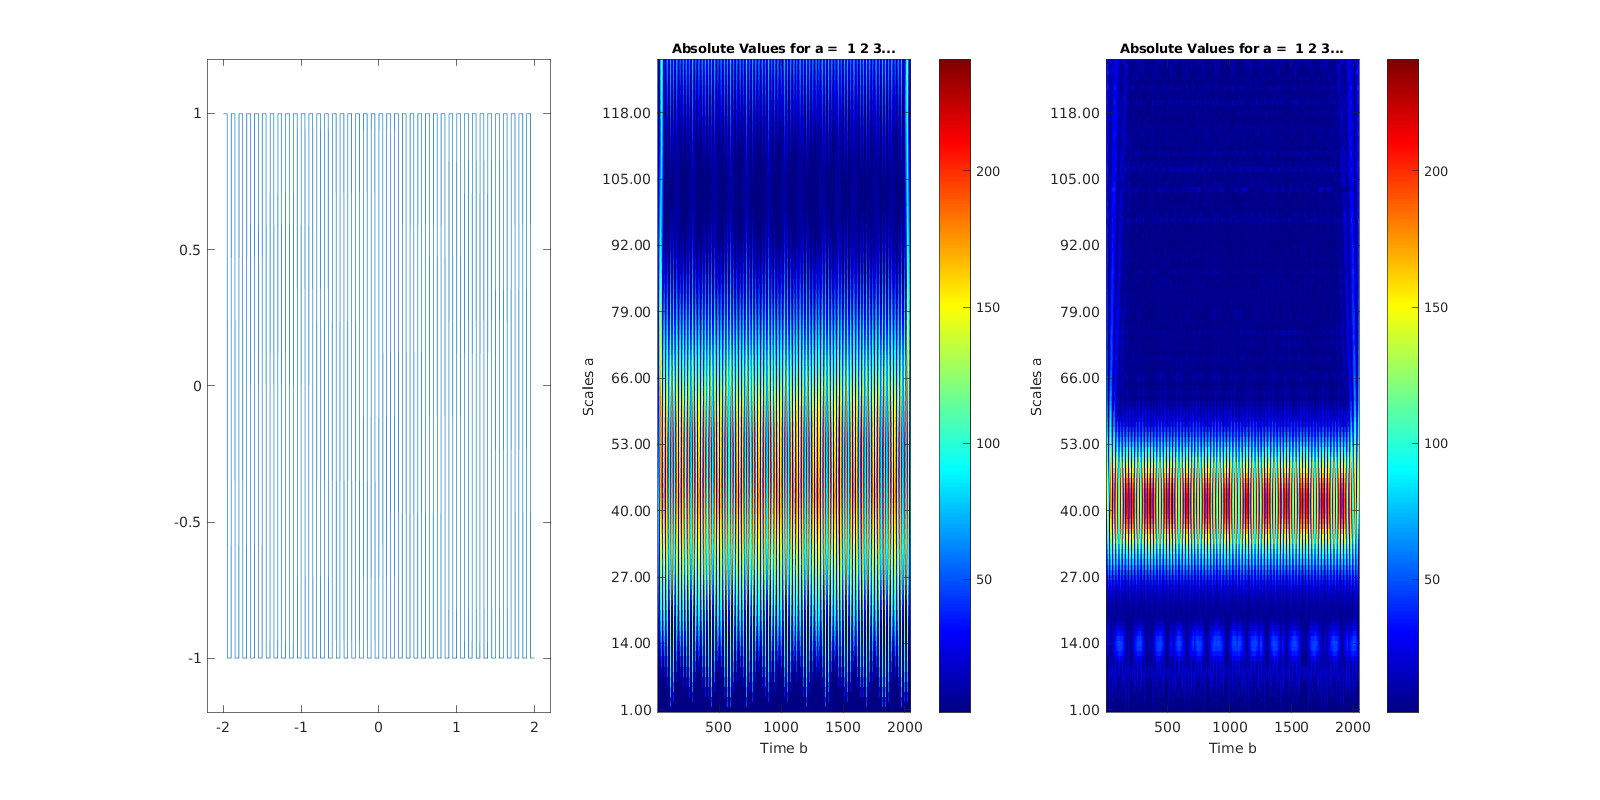

In [55]:
subplot(1,3,1);
x =linspace(-2,2,4*512) ;
y1 =sign(sin(20*pi*x));
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



## 4) $f(t)=\begin{cases} sin(4\pi t) & 0\leq t < \frac{1}{2} \\ sin(40\pi t) & \frac{1}{2}\leq t \leq 1 \end{cases}$

In [58]:
g=inline('((t>=0).*(t<0.5).*sin(4*pi*t))+((t>=0.5).*(t<=1).*sin(40*pi*t))');

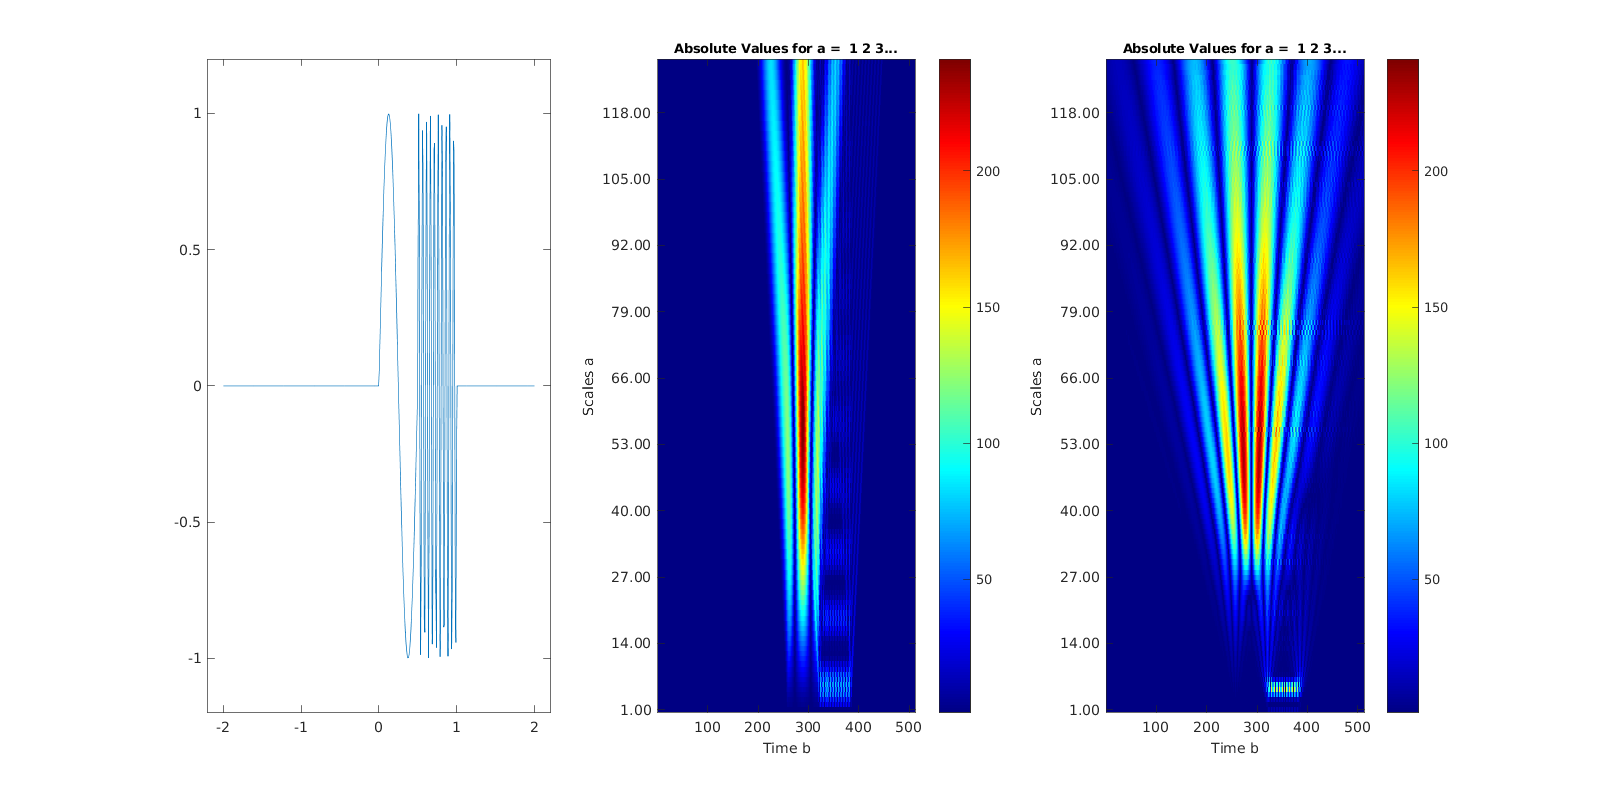

In [59]:
subplot(1,3,1);
x =linspace(-2,2,512) ;
y1 =g(x);
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



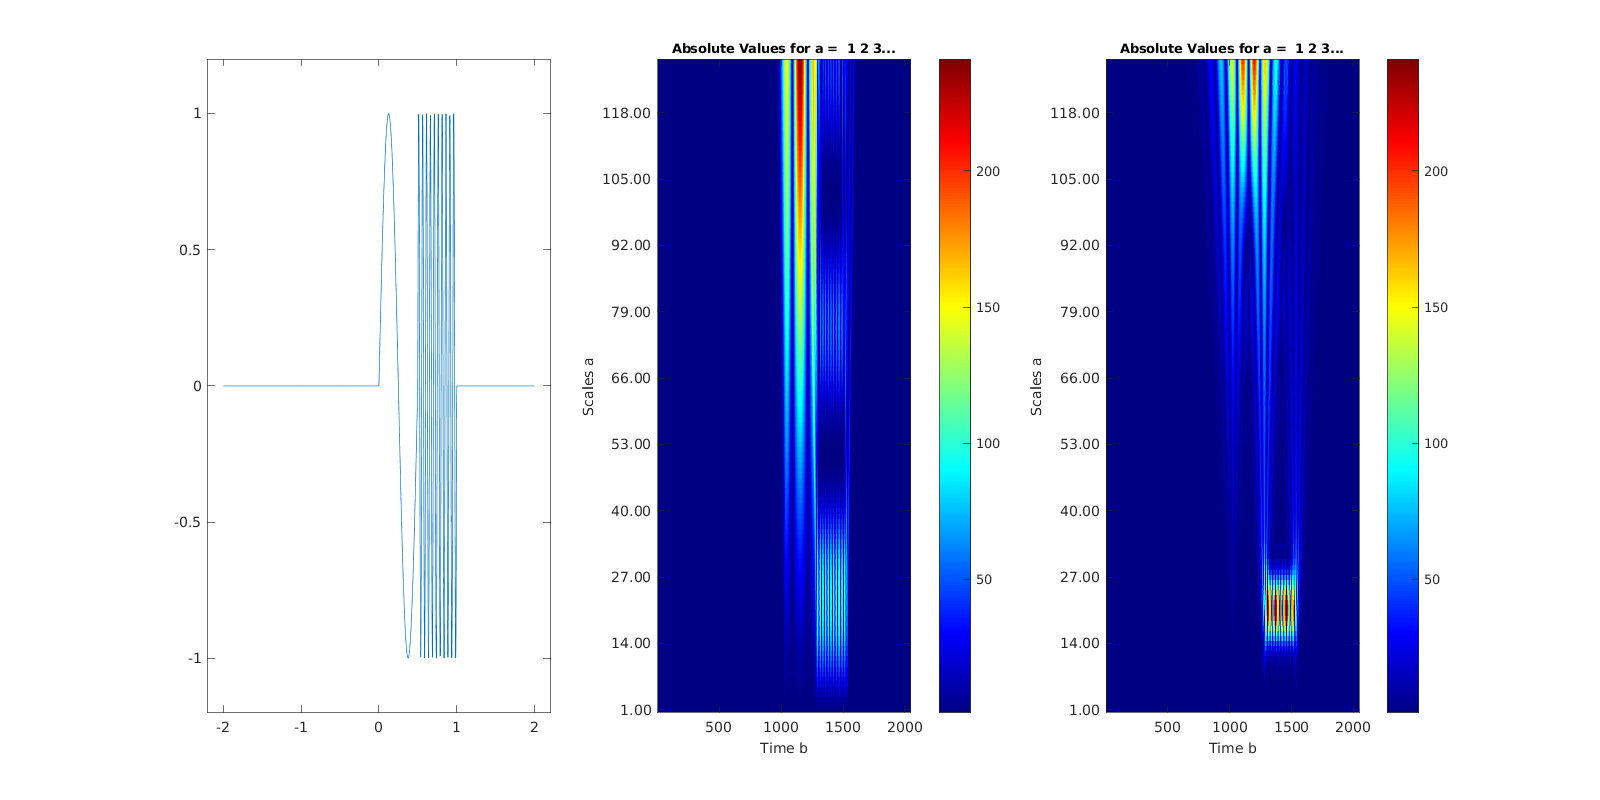

In [60]:
subplot(1,3,1);
x =linspace(-2,2,4*512) ;
y1 =g(x);
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



## 5) $f(t)=\sin(2\pi t) + \sin(200\pi t)$

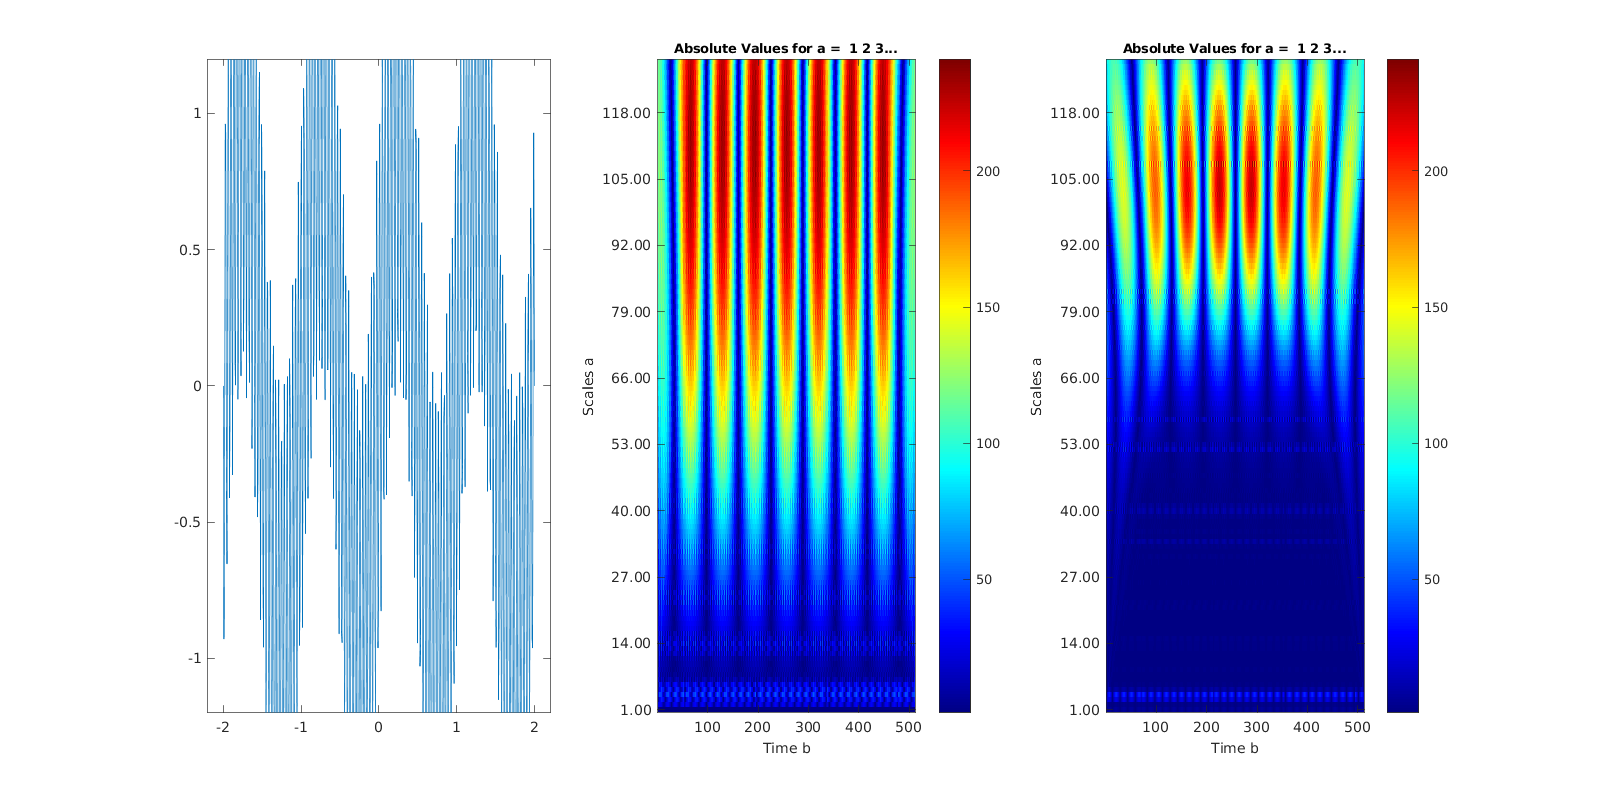

In [62]:
subplot(1,3,1);
x =linspace(-2,2,512) ;
y1 =sin(2*pi*x)+sin(200*pi*x);
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



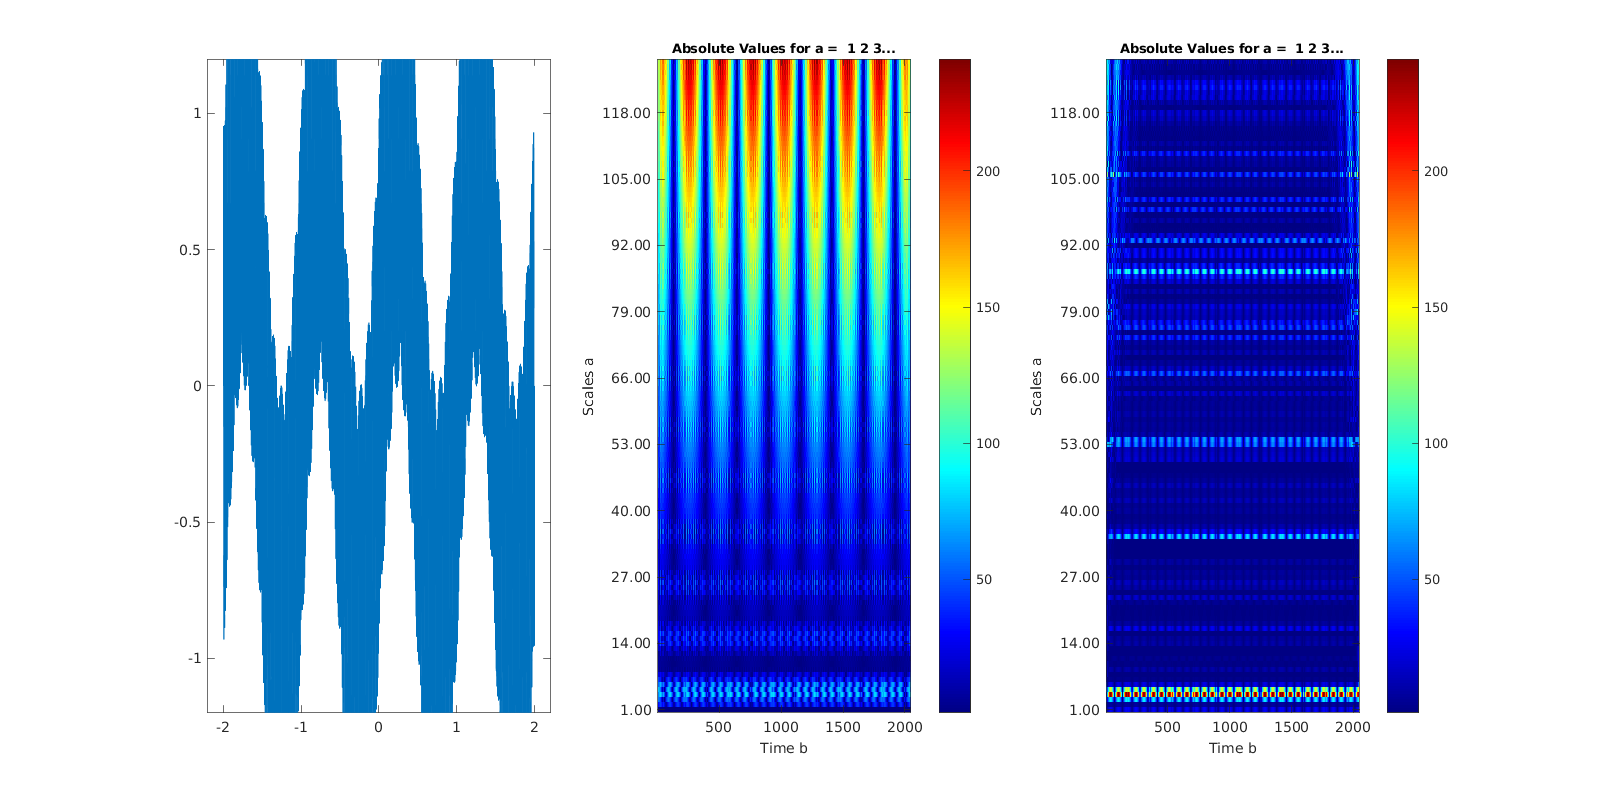

In [64]:
subplot(1,3,1);
x =linspace(-2,2,4*512) ;
y1 =sin(2*pi*x)+sin(200*pi*x);
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



## 5) $f(t)=\sin(2\pi t)\sin(200\pi t)$


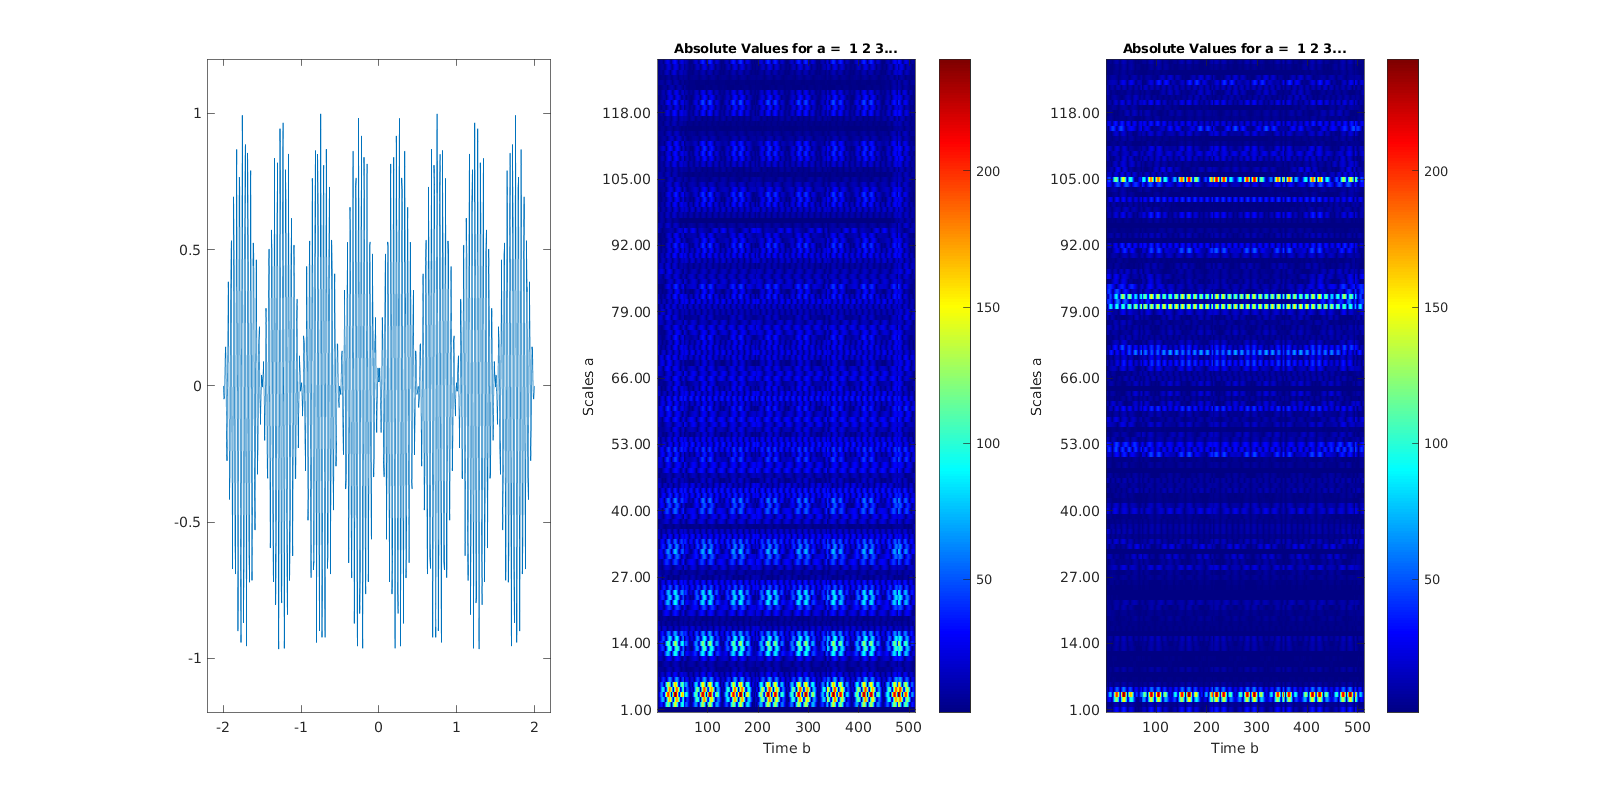

In [67]:
subplot(1,3,1);
x =linspace(-2,2,512) ;
y1 =sin(2*pi*x).*sin(200*pi*x);
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



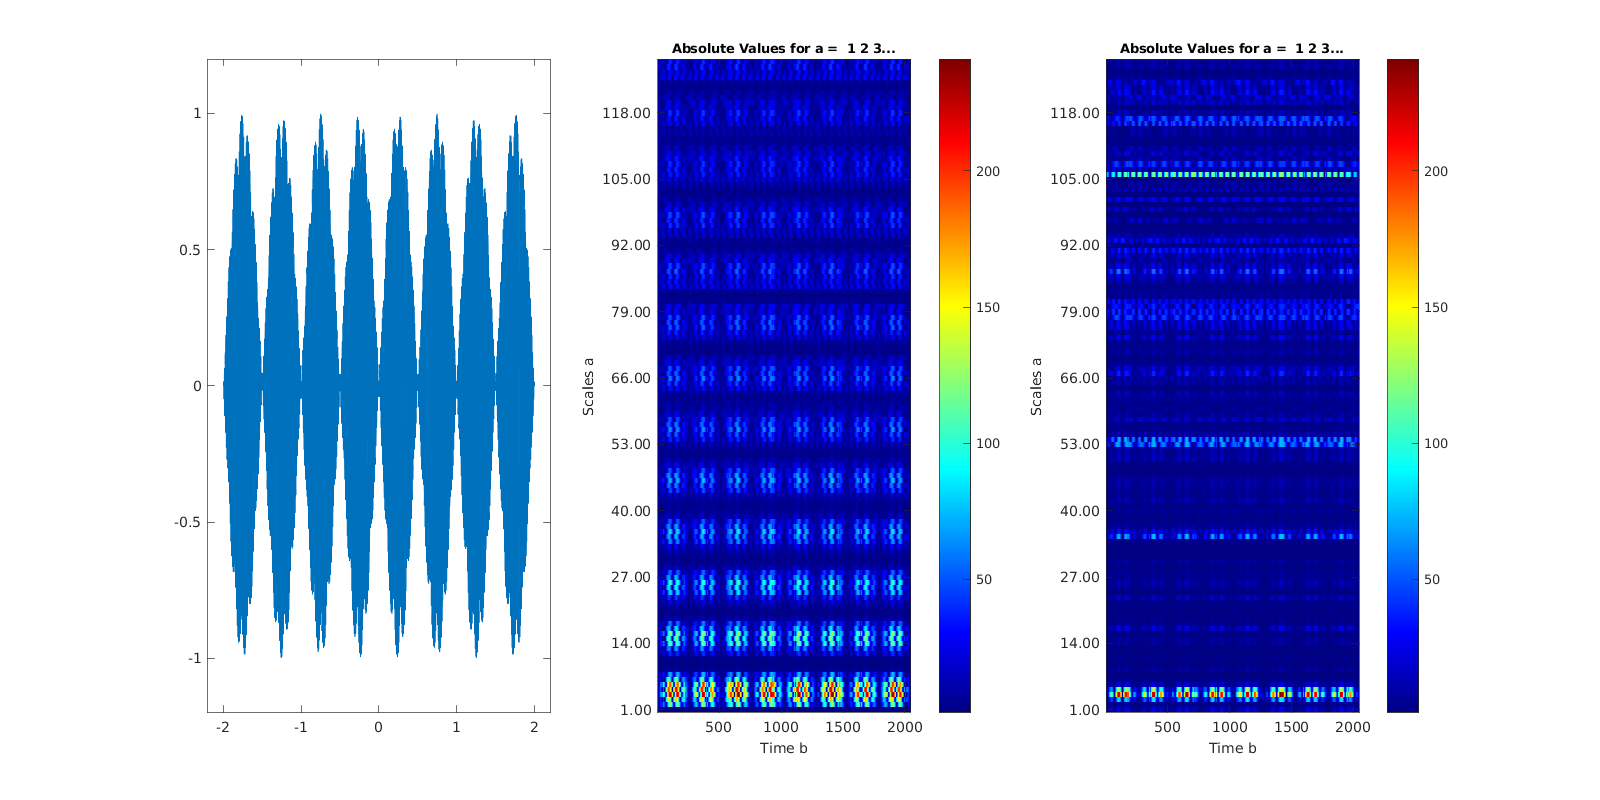

In [68]:
subplot(1,3,1);
x =linspace(-2,2,4*512) ;
y1 =sin(2*pi*x).*sin(200*pi*x);
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



## 6) $f(t)=\sin(2\pi t^2)$ $t\in [0;10]$

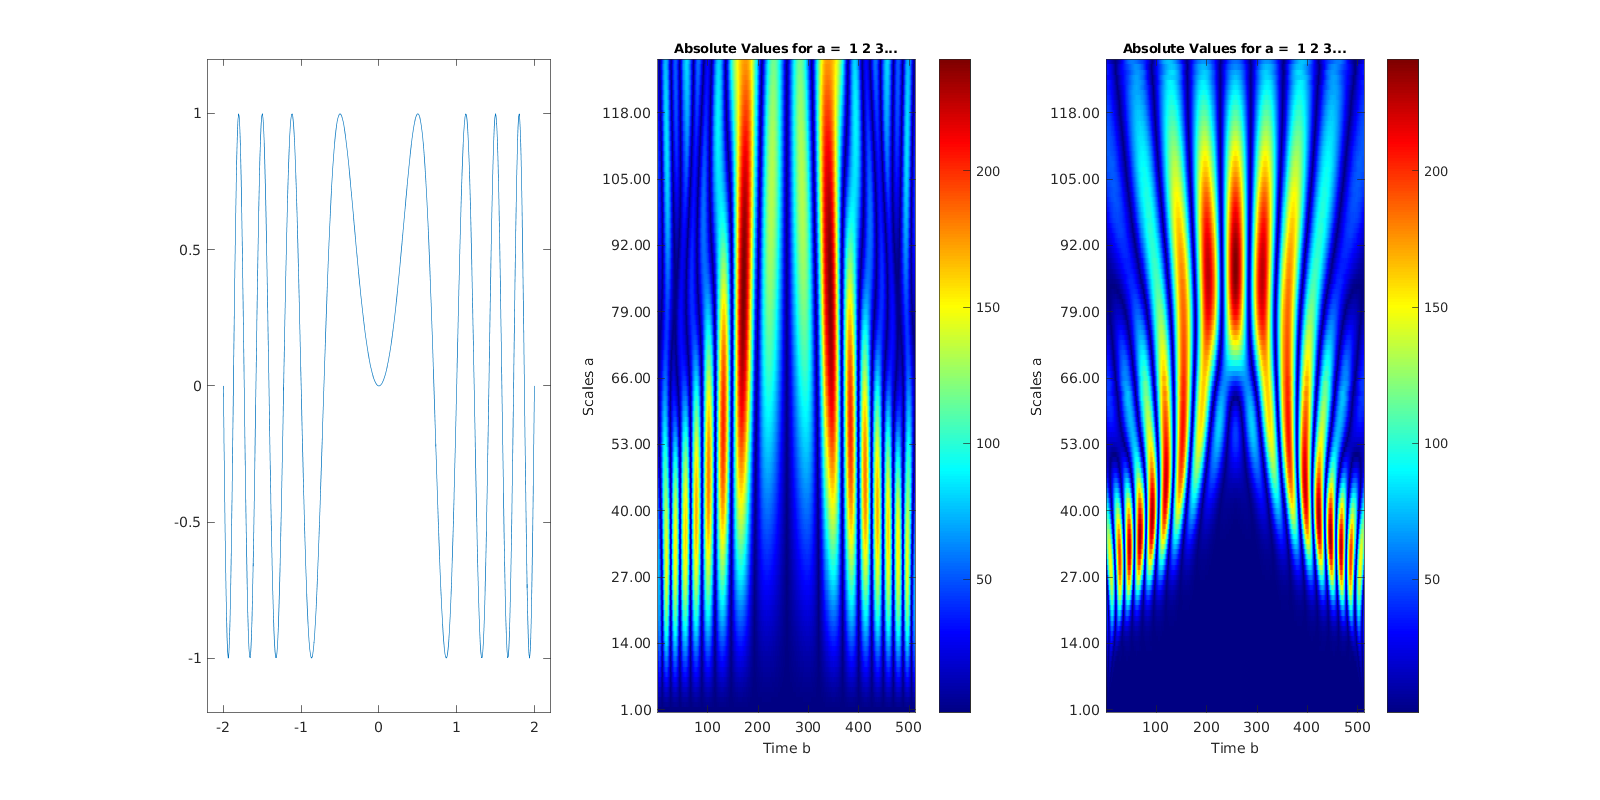

In [69]:
subplot(1,3,1);
x =linspace(-2,2,512) ;
y1 =sin(2*pi*(x.*x));
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



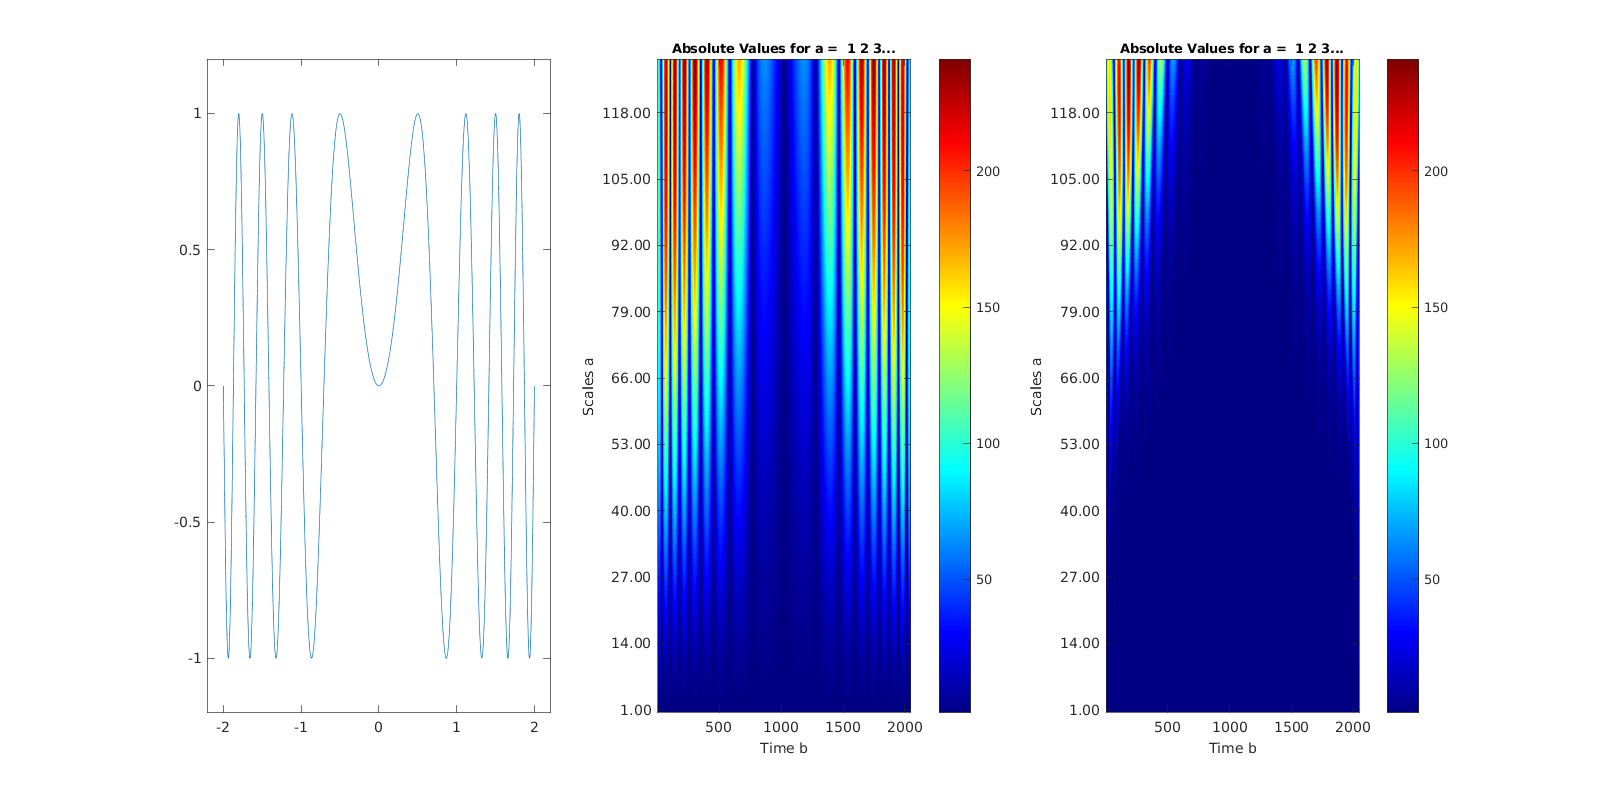

In [70]:
subplot(1,3,1);
x =linspace(-2,2,4*512) ;
y1 =sin(2*pi*(x.*x));
plot(x,y1)
ylim([-1.2 1.2])
xlim([-2.2 2.2])

subplot(1,3,2); 
CWTcoeffs = cwt(y1,1:128,'haar','plot');
colormap jet;
colorbar;

subplot(1,3,3); 
CWTcoeffs = cwt(y1,1:128, 'morl','plot');
colormap jet;
colorbar;



### Exercice 2 
Faire la décomposition sur 1 niveau de du signal précédent -noisdopp- (utiliser une des ondelettes du tableau précédent)

* Observer la taille des coefficients de détail et de moyenne, avec haar, db4, db7 ... faire waveinfo('db')
* Tracer et superposer au signal initial la décomposition obtenue pour une décomposition db4 par exemple.
* A l'aide de cette décomposition (2 signaux) reconstruire le signal initial et évaluer la différence avec celui ci. 

##  Question 1:
* Observer la taille des coefficients de détail et de moyenne, avec haar, db4, db7 ... faire waveinfo('db')

In [103]:
load noisdopp;
s=noisdopp;
ls=length(s);

In [108]:
[cA1,cD1] = dwt(s,'haar');
length(s)
length(cA1)
length(cD1)


ans =

        1024


ans =

   512


ans =

   512



In [113]:
[cA1,cD1] = dwt(s,'db4');
length(s)
length(cA1)
length(cD1)


ans =

        1024


ans =

   515


ans =

   515



In [115]:
[cA1,cD1] = dwt(s,'db7');
length(s)
length(cA1)
length(cD1)


ans =

        1024


ans =

   518


ans =

   518



| Wavelet        | haar           | db4  | db7  |
| ------------- |:-------------:| -----:|-----:|
| Length of Approximation     | 512 | 515 |518 |


##  Question 2:
* Tracer et superposer au signal initial la décomposition obtenue pour une décomposition db4 par exemple.

In [132]:
[cA1,cD1] = dwt(s,'db4');
A1 = upcoef('a',cA,'db4',1,ls); 
D1 = upcoef('d',cD,'db4',3,ls);

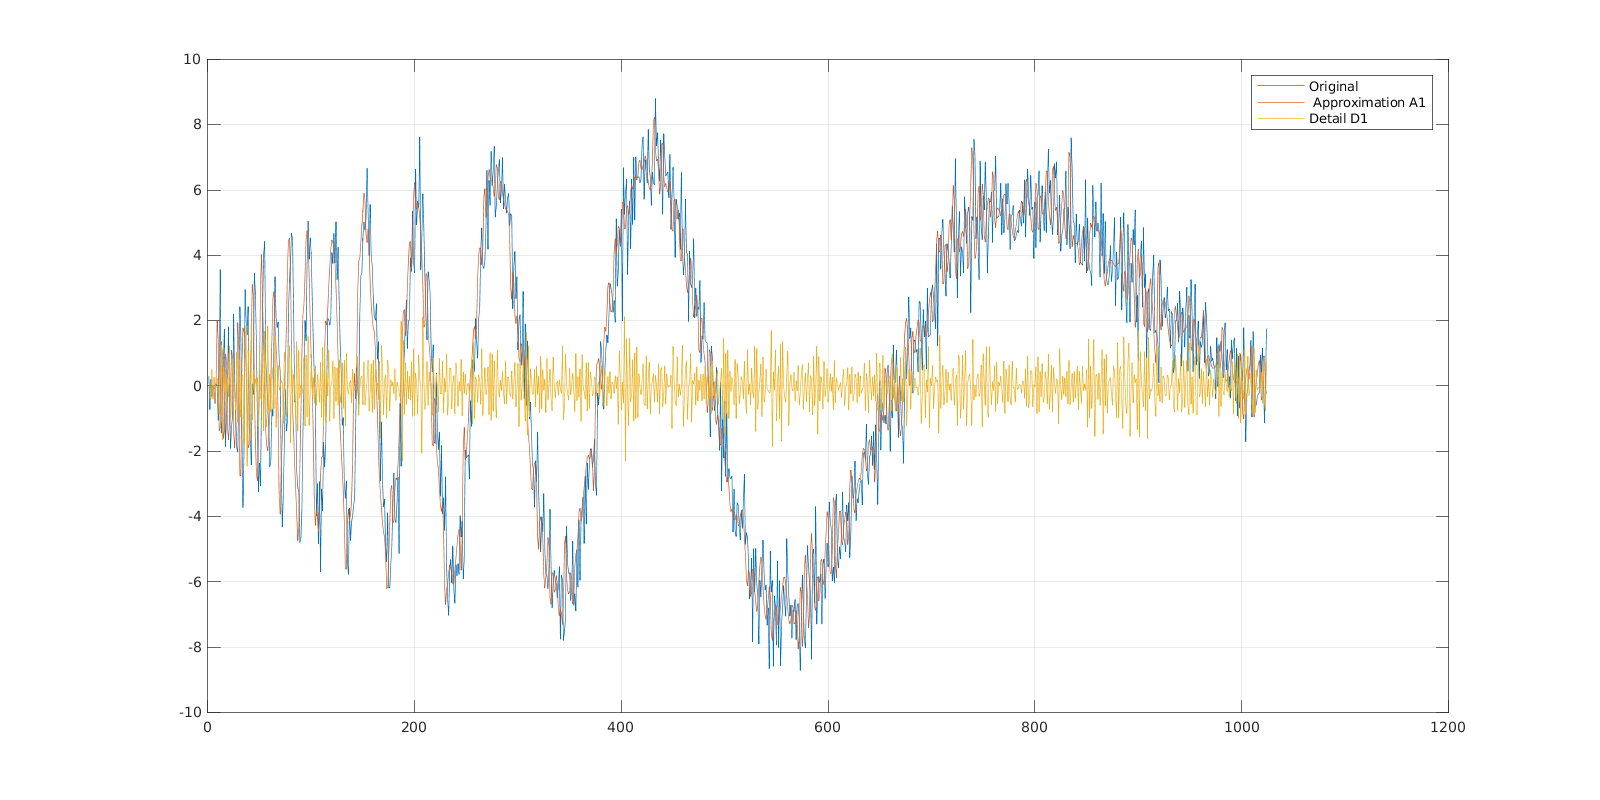

In [127]:

plot(s)
hold on
grid on
plot(A1)
plot(D1)

legend('Original',' Approximation A1','Detail D1')

##  Question 3:
* A l'aide de cette décomposition (2 signaux) reconstruire le signal initial et évaluer la différence avec celui ci. 

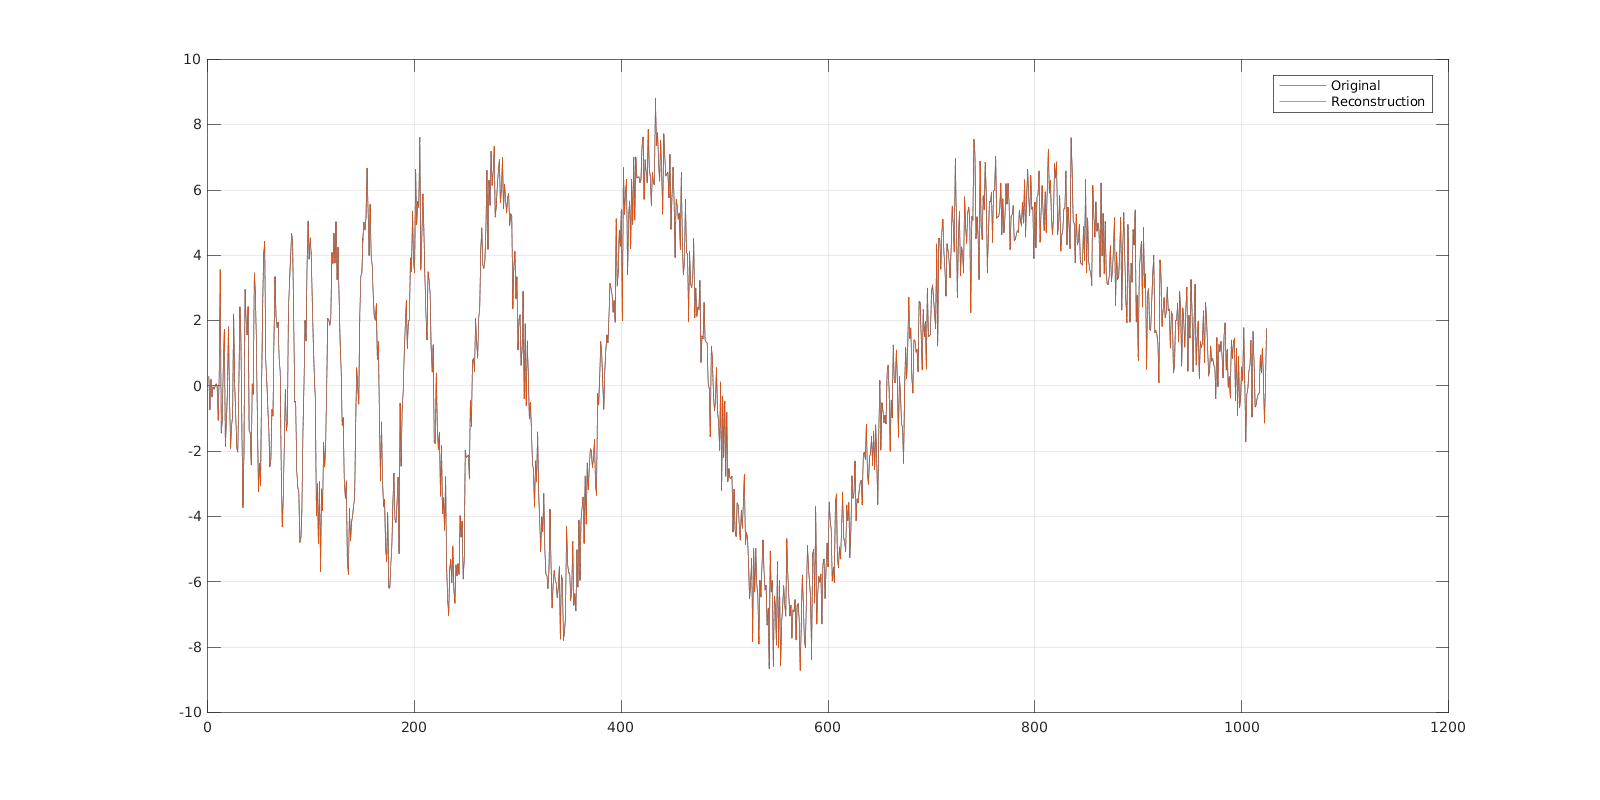

In [134]:
xrec = idwt(cA1,cD1,'db4',ls);
plot(s)
hold on
grid on
plot(xrec)
legend('Original','Reconstruction')

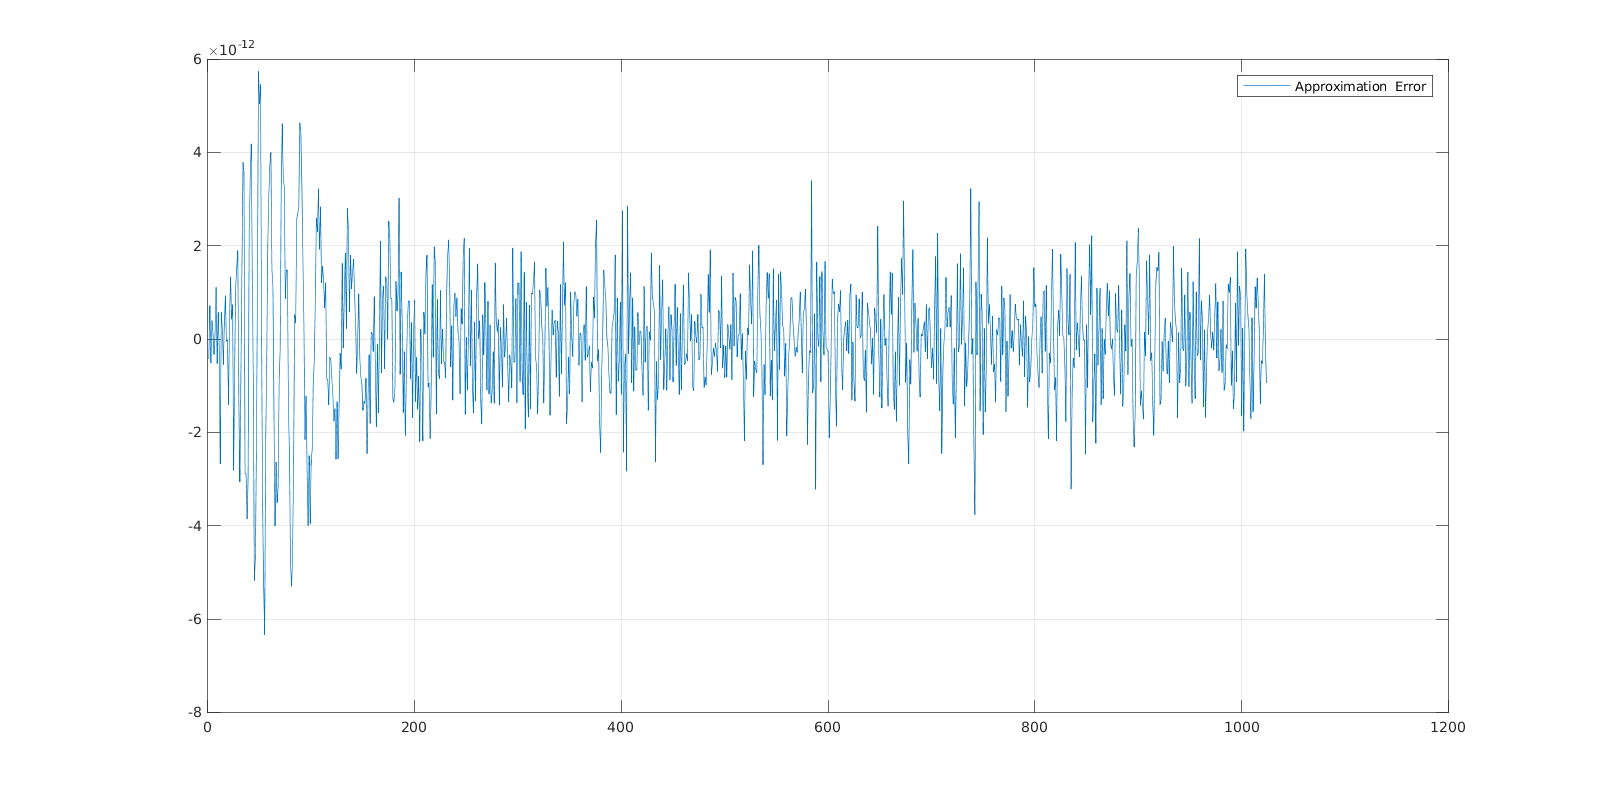

In [136]:
err=xrec -s;
plot(err)
grid on

legend('Approximation  Error')

## 3 Transformée en ondelette discrete 1d - multi-niveau et transformée discrete inverse

Mot clefs : wavedec, appcoef, detcoef

### Exercice 3

* Calculer la décomposition obtenue sur 4, 5 ... niveaux du signal noisdopp avec l'ondelette de votre choix, Représenter la décomposition obtenue façon "scalogram" un superposant les décomposition par niveaux comme ci dessous, il sera possible de pousser le détail jusqu'à aligner les courbes...
![scalo](https://fr.mathworks.com/help/examples/wavelet/win64/PerformMultilevelOneDimensionalWaveletAnalysisExample_02.png)


In [137]:
[C,L] = wavedec(s,4,'db4');

In [142]:
cA1 = appcoef(C,L,'db4',1);
cA2 = appcoef(C,L,'db4',2);
cA3 = appcoef(C,L,'db4',3);
cA4 = appcoef(C,L,'db4',4); 

cD1 = detcoef(C,L,1);
cD2 = detcoef(C,L,2);
cD3 = detcoef(C,L,3);
cD4 = detcoef(C,L,4);

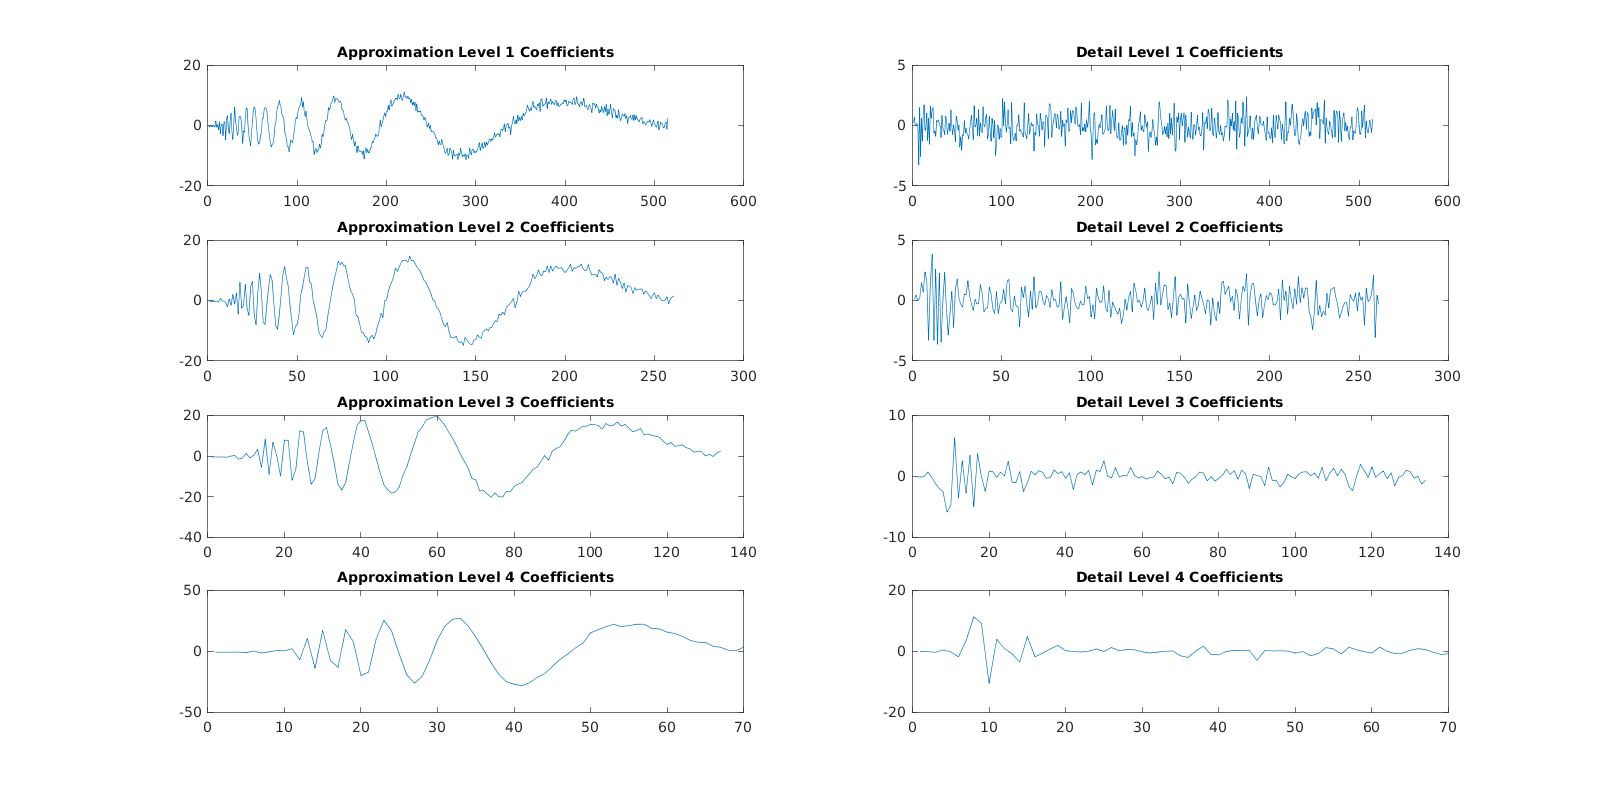

In [143]:
 subplot(4,2,1); 
 plot(cA1); 
 title('Approximation Level 1 Coefficients') 
 subplot(4,2,2); 
 plot(cD1); 
 title('Detail Level 1 Coefficients')
 
subplot(4,2,3); 
 plot(cA2); 
 title('Approximation Level 2 Coefficients') 
 subplot(4,2,4); 
 plot(cD2); 
 title('Detail Level 2 Coefficients')


 subplot(4,2,5); 
 plot(cA3); 
 title('Approximation Level 3 Coefficients') 
 subplot(4,2,6); 
 plot(cD3); 
 title('Detail Level 3 Coefficients')


 subplot(4,2,7); 
 plot(cA4); 
 title('Approximation Level 4 Coefficients') 
 subplot(4,2,8); 
 plot(cD4); 
 title('Detail Level 4 Coefficients')



In [144]:
A1 = wrcoef('a',C,L,'db4',1);
A2 = wrcoef('a',C,L,'db4',2);
A3 = wrcoef('a',C,L,'db4',3);
A4 = wrcoef('a',C,L,'db4',4);

In [145]:
D1 = wrcoef('d',C,L,'db4',1);
D2 = wrcoef('d',C,L,'db4',2);
D3 = wrcoef('d',C,L,'db4',3);
D4 = wrcoef('d',C,L,'db4',4);

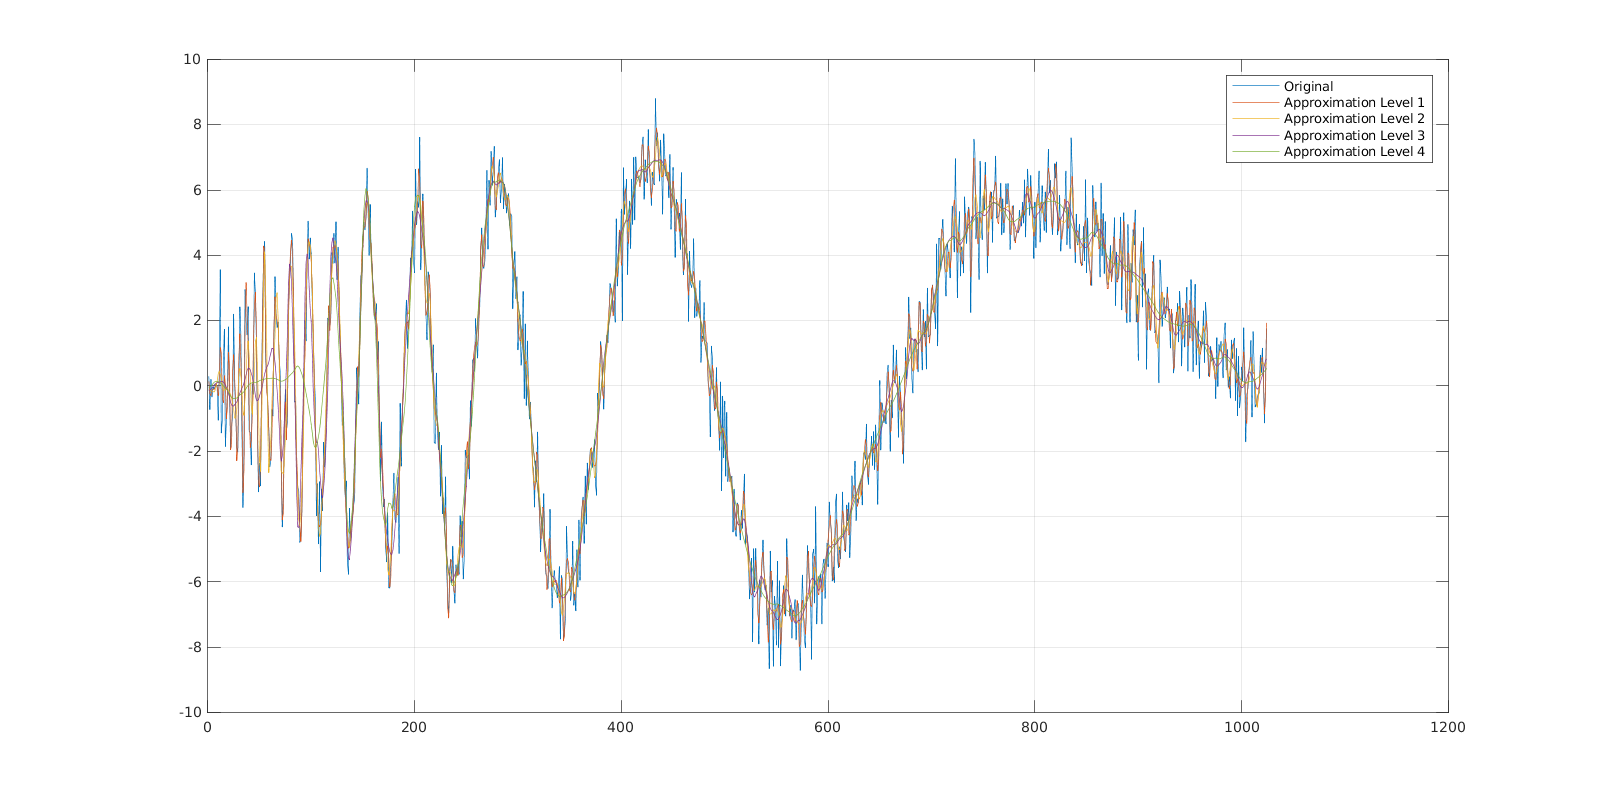

In [146]:
plot(s)
hold on
grid on
plot(A1)
plot(A2)
plot(A3)
plot(A4)
legend('Original','Approximation Level 1','Approximation Level 2','Approximation Level 3','Approximation Level 4')

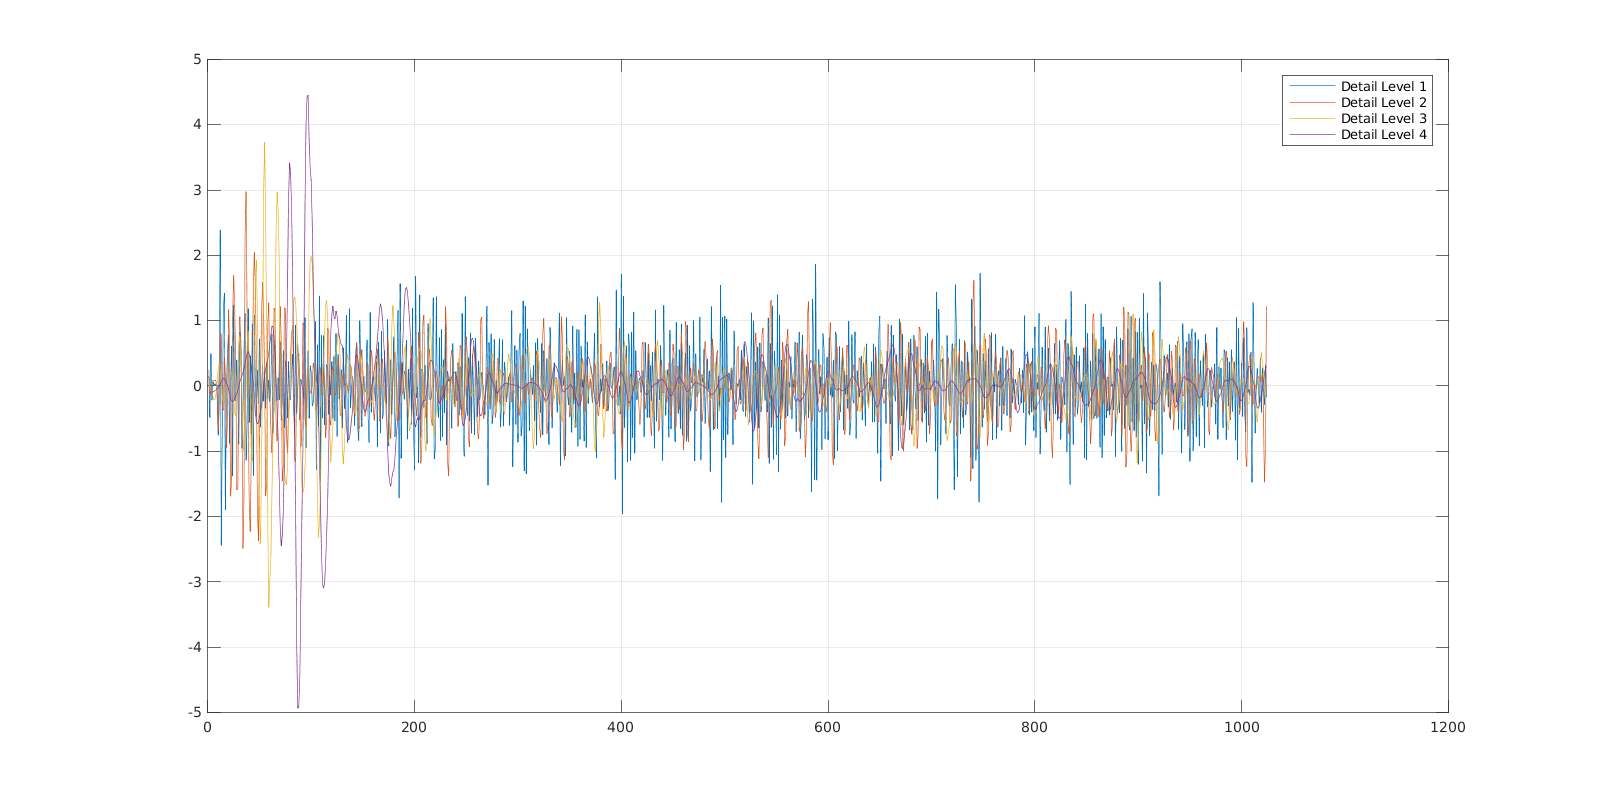

In [147]:
plot(D1)
hold on
grid on
plot(D2)
plot(D3)
plot(D4)
legend('Detail Level 1','Detail Level 2','Detail Level 3','Detail Level 4')

## 4 Applications : 

### Exercice 4 : Compter et effacer les notes de musique

En reprenant le signal de "frère Jacques" du TP1 (sur une dizaine de notes)

Mot clefs : wpdec, wpspectrum

* Représenter à l'aide de la fonction wpspectrum la  musique 
* A l'aide d'une méthode de troncature (on réduit à 0 certains coefficients de la décomposition) proposer une méthode pour compter et effacer une note particulière de la partition.

##  Question 1:
* Représenter à l'aide de la fonction wpspectrum la  musique 

In [16]:
[y,Fs] = audioread('ffj.wav');

In [19]:
%%html
<audio controls>
 <source src="ffj.wav" type="audio/mpeg">
 Your browser does not support the audio element.
</audio>

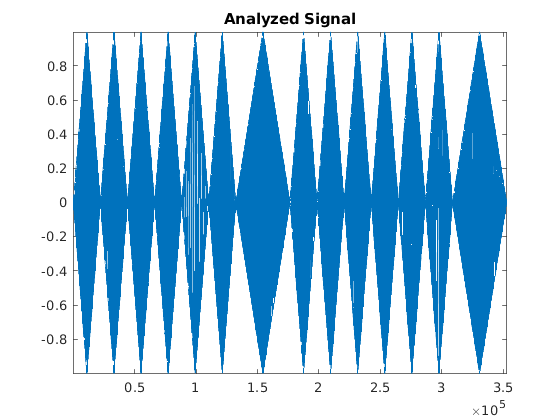

In [22]:

plot(y); 
axis tight
title('Analyzed Signal');

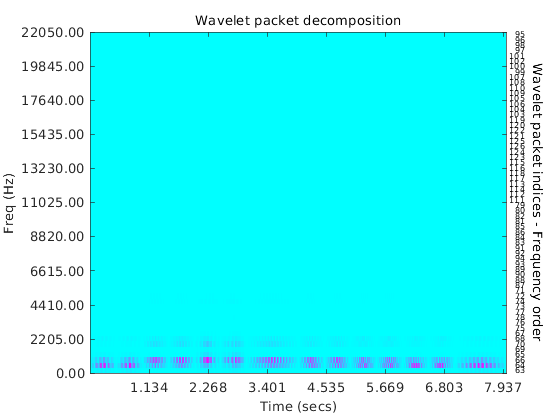

In [23]:
level = 6;
wpt = wpdec(y,level,'db4');
figure;
[S,T,F] = wpspectrum(wpt,Fs,'plot');

##  Question 2:
*  A l'aide d'une méthode de troncature (on réduit à 0 certains coefficients de la décomposition) proposer une méthode pour compter et effacer une note particulière de la partition.

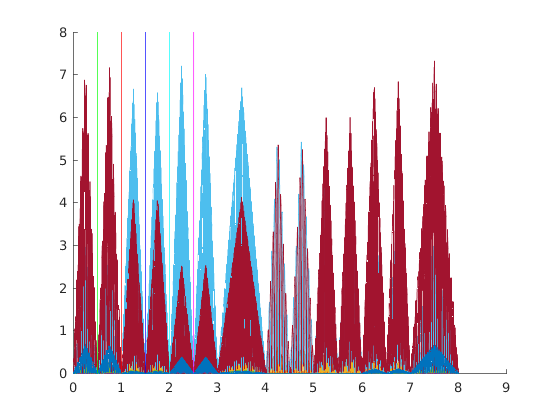

In [33]:

fig=figure; 
hax=axes; 
hold on 
plot(T,S)
SP=1; %your point goes here 
line([SP SP],get(hax,'YLim'),'Color',[1 0 0])

SP=0.5; %your point goes here 
line([SP SP],get(hax,'YLim'),'Color',[0 1 0])

SP=1.5; %your point goes here 
line([SP SP],get(hax,'YLim'),'Color',[0 0 1])

SP=2; %your point goes here 
line([SP SP],get(hax,'YLim'),'Color',[0 1 1])

SP=2.5; %your point goes here 
line([SP SP],get(hax,'YLim'),'Color',[1 0 1])

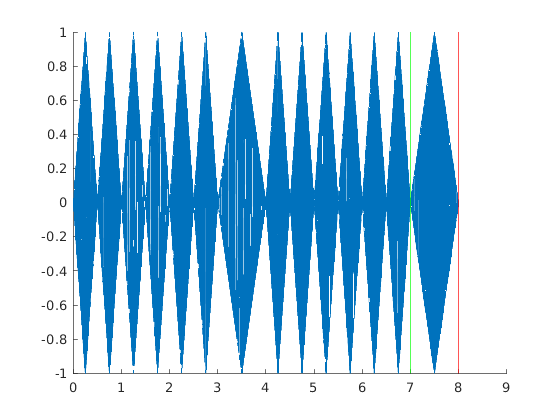

In [128]:
fig=figure; 
hax=axes; 
hold on 
plot(T,y)
SP=0.5*14; %your point goes here 
line([SP SP],get(hax,'YLim'),'Color',[0 1 0])

SP=0.5*16; %your point goes here 
line([SP SP],get(hax,'YLim'),'Color',[1 0 0])

In [130]:
%%file removePartion.m
function ns = removePartion(s,time,par)
% in-file
if par==1
  ns=s(time<(0.5*par));

else
ToExtract1 = (time < 0.5*(par-1 )) ;
ToExtract2 = (time > 0.5*(par )) ;

   ns=[s(ToExtract1)',s(ToExtract2)'];
end

if par==1
    ns=s(time<(0.5*par));
elseif (par>1)  & (par<7)
ToExtract1 = (time < 0.5*(par-1 )) ;
ToExtract2 = (time > 0.5*(par )) ;
ns=[s(ToExtract1)',s(ToExtract2)'];
elseif par==7
ToExtract1 = (time < 0.5*6) ;
ToExtract2 = (time >0.5*8) ;
ns=[s(ToExtract1)',s(ToExtract2)'];
elseif (par>7)  & (par<14)
ToExtract1 = (time < 0.5*(par )) ;
ToExtract2 = (time >0.5*(par+1 )) ;
ns=[s(ToExtract1)',s(ToExtract2)'];
else 
ToExtract1 = (time < 0.5*(par )) ;
ToExtract2 = (time >0.5*(par+2 )) ;
ns=[s(ToExtract1)',s(ToExtract2)'];
end

end

Created file '/home/nabil.madali/removePartion.m'.


## Remove The Partition Number Seven


In [136]:
rSP=removePartion(y,T,7);

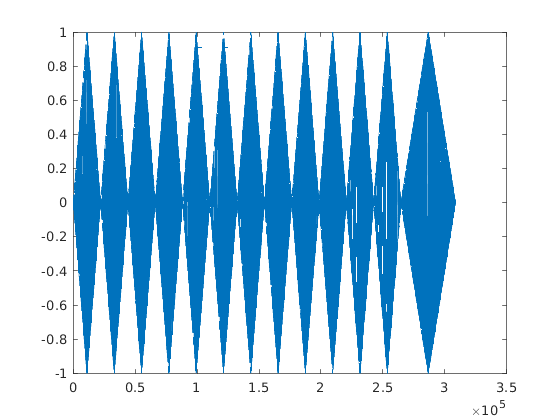

In [137]:
plot(rSP)

In [138]:
audiowrite('rSP.wav',rSP,Fs);

In [139]:
%%html
<audio controls>
 <source src="rSP.wav" type="audio/mpeg">
 Your browser does not support the audio element.
</audio>

### Exercice 5 : Compter les discontinuités d'un signal

* Se donner un signal possédants des discontinuité trouver une méthode pour compter celles ci.
* Problème identique mais à partir d'un signal continu mais dont la dérivée est discontinue, détecter ses discontinuités.

##  Question 1:
* Se donner un signal possédants des discontinuité trouver une méthode pour compter celles ci.

In [191]:
x=linspace(-3,3,3*512);

In [212]:
f=inline('sin(2 *(x.^2)).* sin(20*pi*x).*(x>=-3).*(x<=-2) + cos(4*pi*x).*(x>=-2).*(x<=0)  +sin(2 *(x.^2)).*(x>=0).*(x<=2)    ')


f =

     Inline function:
     f(x) = sin(2 *(x.^2)).* sin(20*pi*x).*(x>=-3).*(x<=-2) + cos(4*pi*x).*(x>=-2).*(x<=0)  +sin(2 *(x.^2)).*(x>=0).*(x<=2)



In [213]:
f(x);

In [214]:
[C,L] = wavedec(f(x),4,'haar');

D1 = wrcoef('d',C,L,'haar',1);
D2 = wrcoef('d',C,L,'haar',2);
D3 = wrcoef('d',C,L,'haar',3);
D4 = wrcoef('d',C,L,'haar',4);

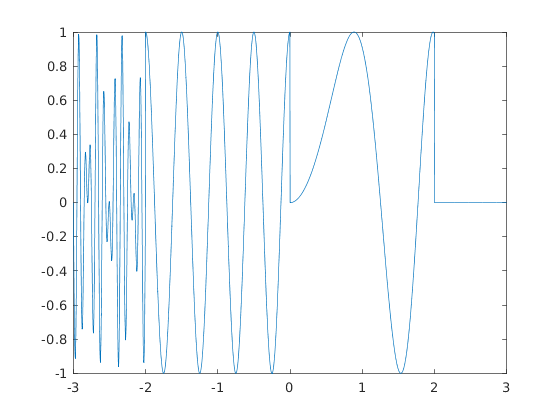

In [217]:
plot(x,f(x))


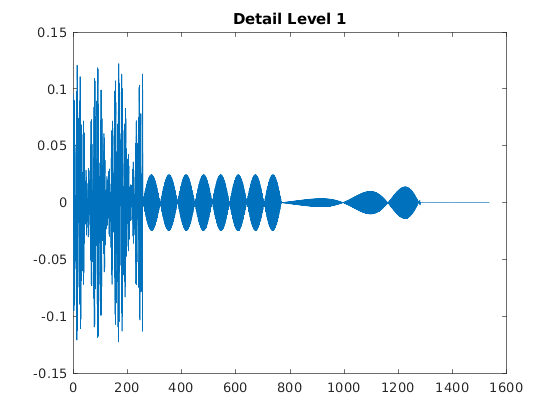

In [218]:
plot(D1); 
title('Detail Level 1')

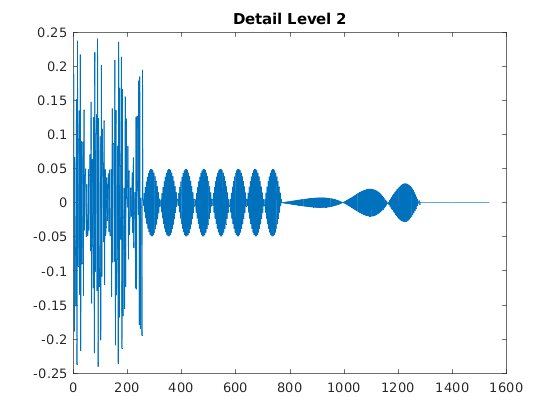

In [219]:
plot(D2); 
title('Detail Level 2')

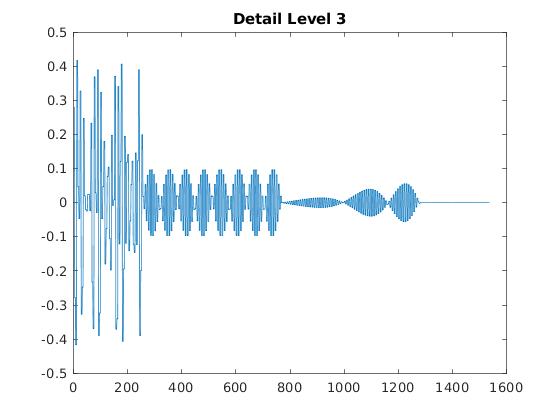

In [220]:
plot(D3); 
title('Detail Level 3')

## Remarque:
Les détails des premier et deuxième niveaux (D1 et D2) montrent le plus clairement la discontinuité

##  Question 2:
* Problème identique mais à partir d'un signal continu mais dont la dérivée est discontinue, détecter ses discontinuités.

In [221]:
load scddvbrk;
x = scddvbrk;


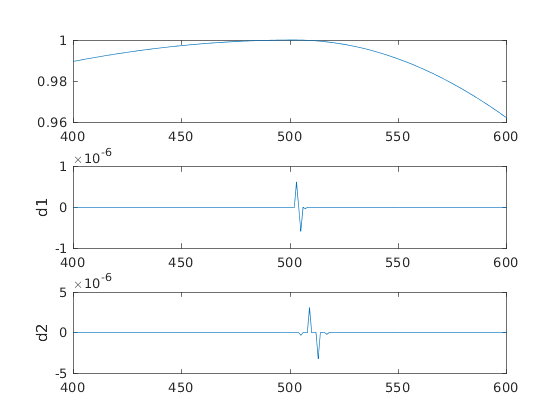

In [222]:
level = 2;
[c,l] = wavedec(x,level,'db4');
[d1 d2] = detcoef(c,l,1:level);
d1up = dyadup(d1,0);
d2up = dyadup(dyadup(d2,0),0);
subplot(311)
plot(x)
xlim([400 600])
subplot(312)
plot(d1up);ylabel('d1'),xlim([400 600])
subplot(313),
plot(d2up);ylabel('d2'),xlim([400 600])

## Remarque:
Les détails sont élevés uniquement au milieu du signal et sont négligeables ailleurs. Ceci suggère la présence d'informations à haute fréquence - un changement soudain ou une discontinuité - autour du temps = 500.